## Import Relevant Libraries

In [2]:
import numpy as np
import pandas as pd
import math
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action="ignore", category=FutureWarning)

## Loading Dataset

In [3]:
df = pd.read_csv('Data/Train_Dataset.csv')

# Data Visualization

#### Check the shape

In [4]:
print(df.shape)

(121856, 40)


#### Inspect the initial 5 records of the dataset

In [ ]:
print(df.head())

#### Inspect the last 5 records of the dataset

In [8]:
print(df.tail())

              ID Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  \
121851  12207714         29250        0.0         0.0          NaN        1.0   
121852  12173765         15750        0.0         1.0          1.0        0.0   
121853  12103937          8100        0.0         1.0          0.0        1.0   
121854  12170623         38250        1.0         1.0          0.0        1.0   
121855  12105610          9000        1.0         1.0          1.0        1.0   

        Child_Count Credit_Amount Loan_Annuity Accompany_Client  ...  \
121851          0.0        107820       3165.3         Relative  ...   
121852          0.0        104256      3388.05            Alone  ...   
121853          1.0       55107.9      2989.35            Alone  ...   
121854          0.0         45000      2719.35            Alone  ...   
121855          1.0      62428.95      4201.65            Alone  ...   

       Client_Permanent_Match_Tag Client_Contact_Work_Tag  \
121851             

#### Inspect the information of the dataset

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

#### Inspect the statistical description of the dataset

In [10]:
print(df.describe())

                 ID      Car_Owned     Bike_Owned    Active_Loan  \
count  1.218560e+05  118275.000000  118232.000000  118221.000000   
mean   1.216093e+07       0.342854       0.332262       0.499175   
std    3.517694e+04       0.474665       0.471026       0.500001   
min    1.210000e+07       0.000000       0.000000       0.000000   
25%    1.213046e+07       0.000000       0.000000       0.000000   
50%    1.216093e+07       0.000000       0.000000       0.000000   
75%    1.219139e+07       1.000000       1.000000       1.000000   
max    1.222186e+07       1.000000       1.000000       1.000000   

           House_Own    Child_Count  Own_House_Age     Mobile_Tag  \
count  118195.000000  118218.000000   41761.000000  121856.000000   
mean        0.692060       0.417779      12.157324       0.999992   
std         0.461644       0.728802      12.056079       0.002865   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       

#### Inspect the null values in the dataset

In [11]:
print(df.isnull().sum())

ID                                0
Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Own_House_Age                 80095
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members          2410
Cleint_City_Rating          

### Inspect the unique values in the dataset

In [13]:
print(df.nunique())

ID                            121856
Client_Income                   1516
Car_Owned                          2
Bike_Owned                         2
Active_Loan                        2
House_Own                          2
Child_Count                       14
Credit_Amount                   6816
Loan_Annuity                   16680
Accompany_Client                   7
Client_Income_Type                 8
Client_Education                   5
Client_Marital_Status              4
Client_Gender                      3
Loan_Contract_Type                 2
Client_Housing_Type                6
Population_Region_Relative       164
Age_Days                       22583
Employed_Days                  13220
Registration_Days              19254
ID_Days                         9655
Own_House_Age                     55
Mobile_Tag                         2
Homephone_Tag                      2
Workphone_Working                  2
Client_Occupation                 18
Client_Family_Members             15
C

### Inspect the correlation of the dataset

In [15]:
print(df.corr())

                                ID  Car_Owned  Bike_Owned  Active_Loan  \
ID                        1.000000  -0.003510   -0.001487    -0.000836   
Car_Owned                -0.003510   1.000000   -0.000409    -0.001577   
Bike_Owned               -0.001487  -0.000409    1.000000     0.001545   
Active_Loan              -0.000836  -0.001577    0.001545     1.000000   
House_Own                 0.000588  -0.008344    0.002125    -0.005709   
Child_Count              -0.008734   0.100579    0.002209     0.001789   
Own_House_Age             0.003739        NaN    0.005183    -0.005846   
Mobile_Tag               -0.002055  -0.004026   -0.004123     0.002904   
Homephone_Tag            -0.005787   0.011443   -0.002272     0.001333   
Workphone_Working         0.003871  -0.008597   -0.005849     0.000222   
Client_Family_Members    -0.006603   0.148582    0.003196    -0.000822   
Cleint_City_Rating       -0.002193  -0.022454    0.000219    -0.002666   
Application_Process_Day   0.001520  -0

### Inspect the skewness of the dataset

In [14]:
print(df.skew())

ID                          6.127353e-19
Car_Owned                   6.621475e-01
Bike_Owned                  7.122355e-01
Active_Loan                 3.298953e-03
House_Own                  -8.320833e-01
Child_Count                 2.191615e+00
Own_House_Age               2.724026e+00
Mobile_Tag                 -3.490788e+02
Homephone_Tag               1.496126e+00
Workphone_Working           9.733501e-01
Client_Family_Members       1.033818e+00
Cleint_City_Rating          5.519936e-02
Application_Process_Day     7.727949e-03
Application_Process_Hour   -3.423587e-02
Score_Source_1             -6.709043e-02
Score_Source_2              1.253458e+02
Social_Circle_Default       2.656499e+00
Phone_Change                7.165404e-01
Credit_Bureau               1.259319e+00
Default                     3.076618e+00
dtype: float64


# Data Pre Processing

### Conversions

In [5]:
# Get a list of all column names in the DataFrame
all_cols = df.columns.tolist()

# Remove columns that are not numeric
non_numeric_cols = ['ID', 'Score_Source_1', 'Score_Source_2', 'Score_Source_3', 'Credit_Bureau']
numeric_cols = [col for col in all_cols if col not in non_numeric_cols]

# Create a new DataFrame with only the numeric columns
initdf = df[numeric_cols]

# List of columns which are in object type, to convert to numeric type
toconvert_type_list=['Client_Income','Credit_Amount','Loan_Annuity','Population_Region_Relative','Age_Days','Employed_Days','Registration_Days','ID_Days']

# List of columns which are categorical type
categorical_list = ['Accompany_Client', 'Client_Income_Type', 'Client_Education', 'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type', 'Client_Occupation', 'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag', 'Type_Organization']

# List of columns which are numerical type
numeric_list=['Bike_Owned', 'Active_Loan', 'House_Own', 'Child_Count', 'Own_House_Age', 'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Client_Family_Members', 'Cleint_City_Rating', 'Application_Process_Day', 'Application_Process_Hour', 'Social_Circle_Default', 'Phone_Change', 'Default']


### visualize the target variable

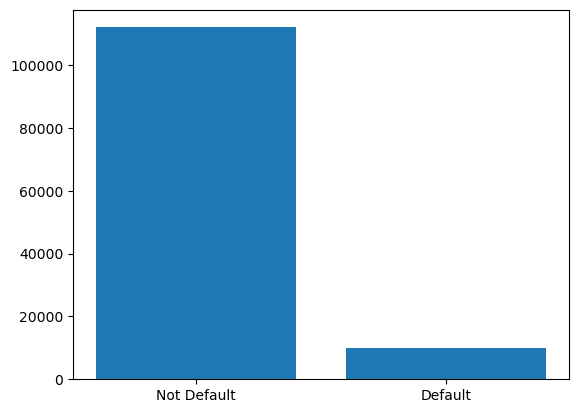

In [6]:
# create a bar plot of the counts for each unique value in the "Default" column
counts = initdf['Default'].value_counts()
plt.bar(counts.index, counts.values)

# set the x-tick labels to "Not Default" and "Default"
plt.xticks([0, 1], ['Not Default', 'Default'])

# show the plot
plt.show()

### Data visualization for categorical columns

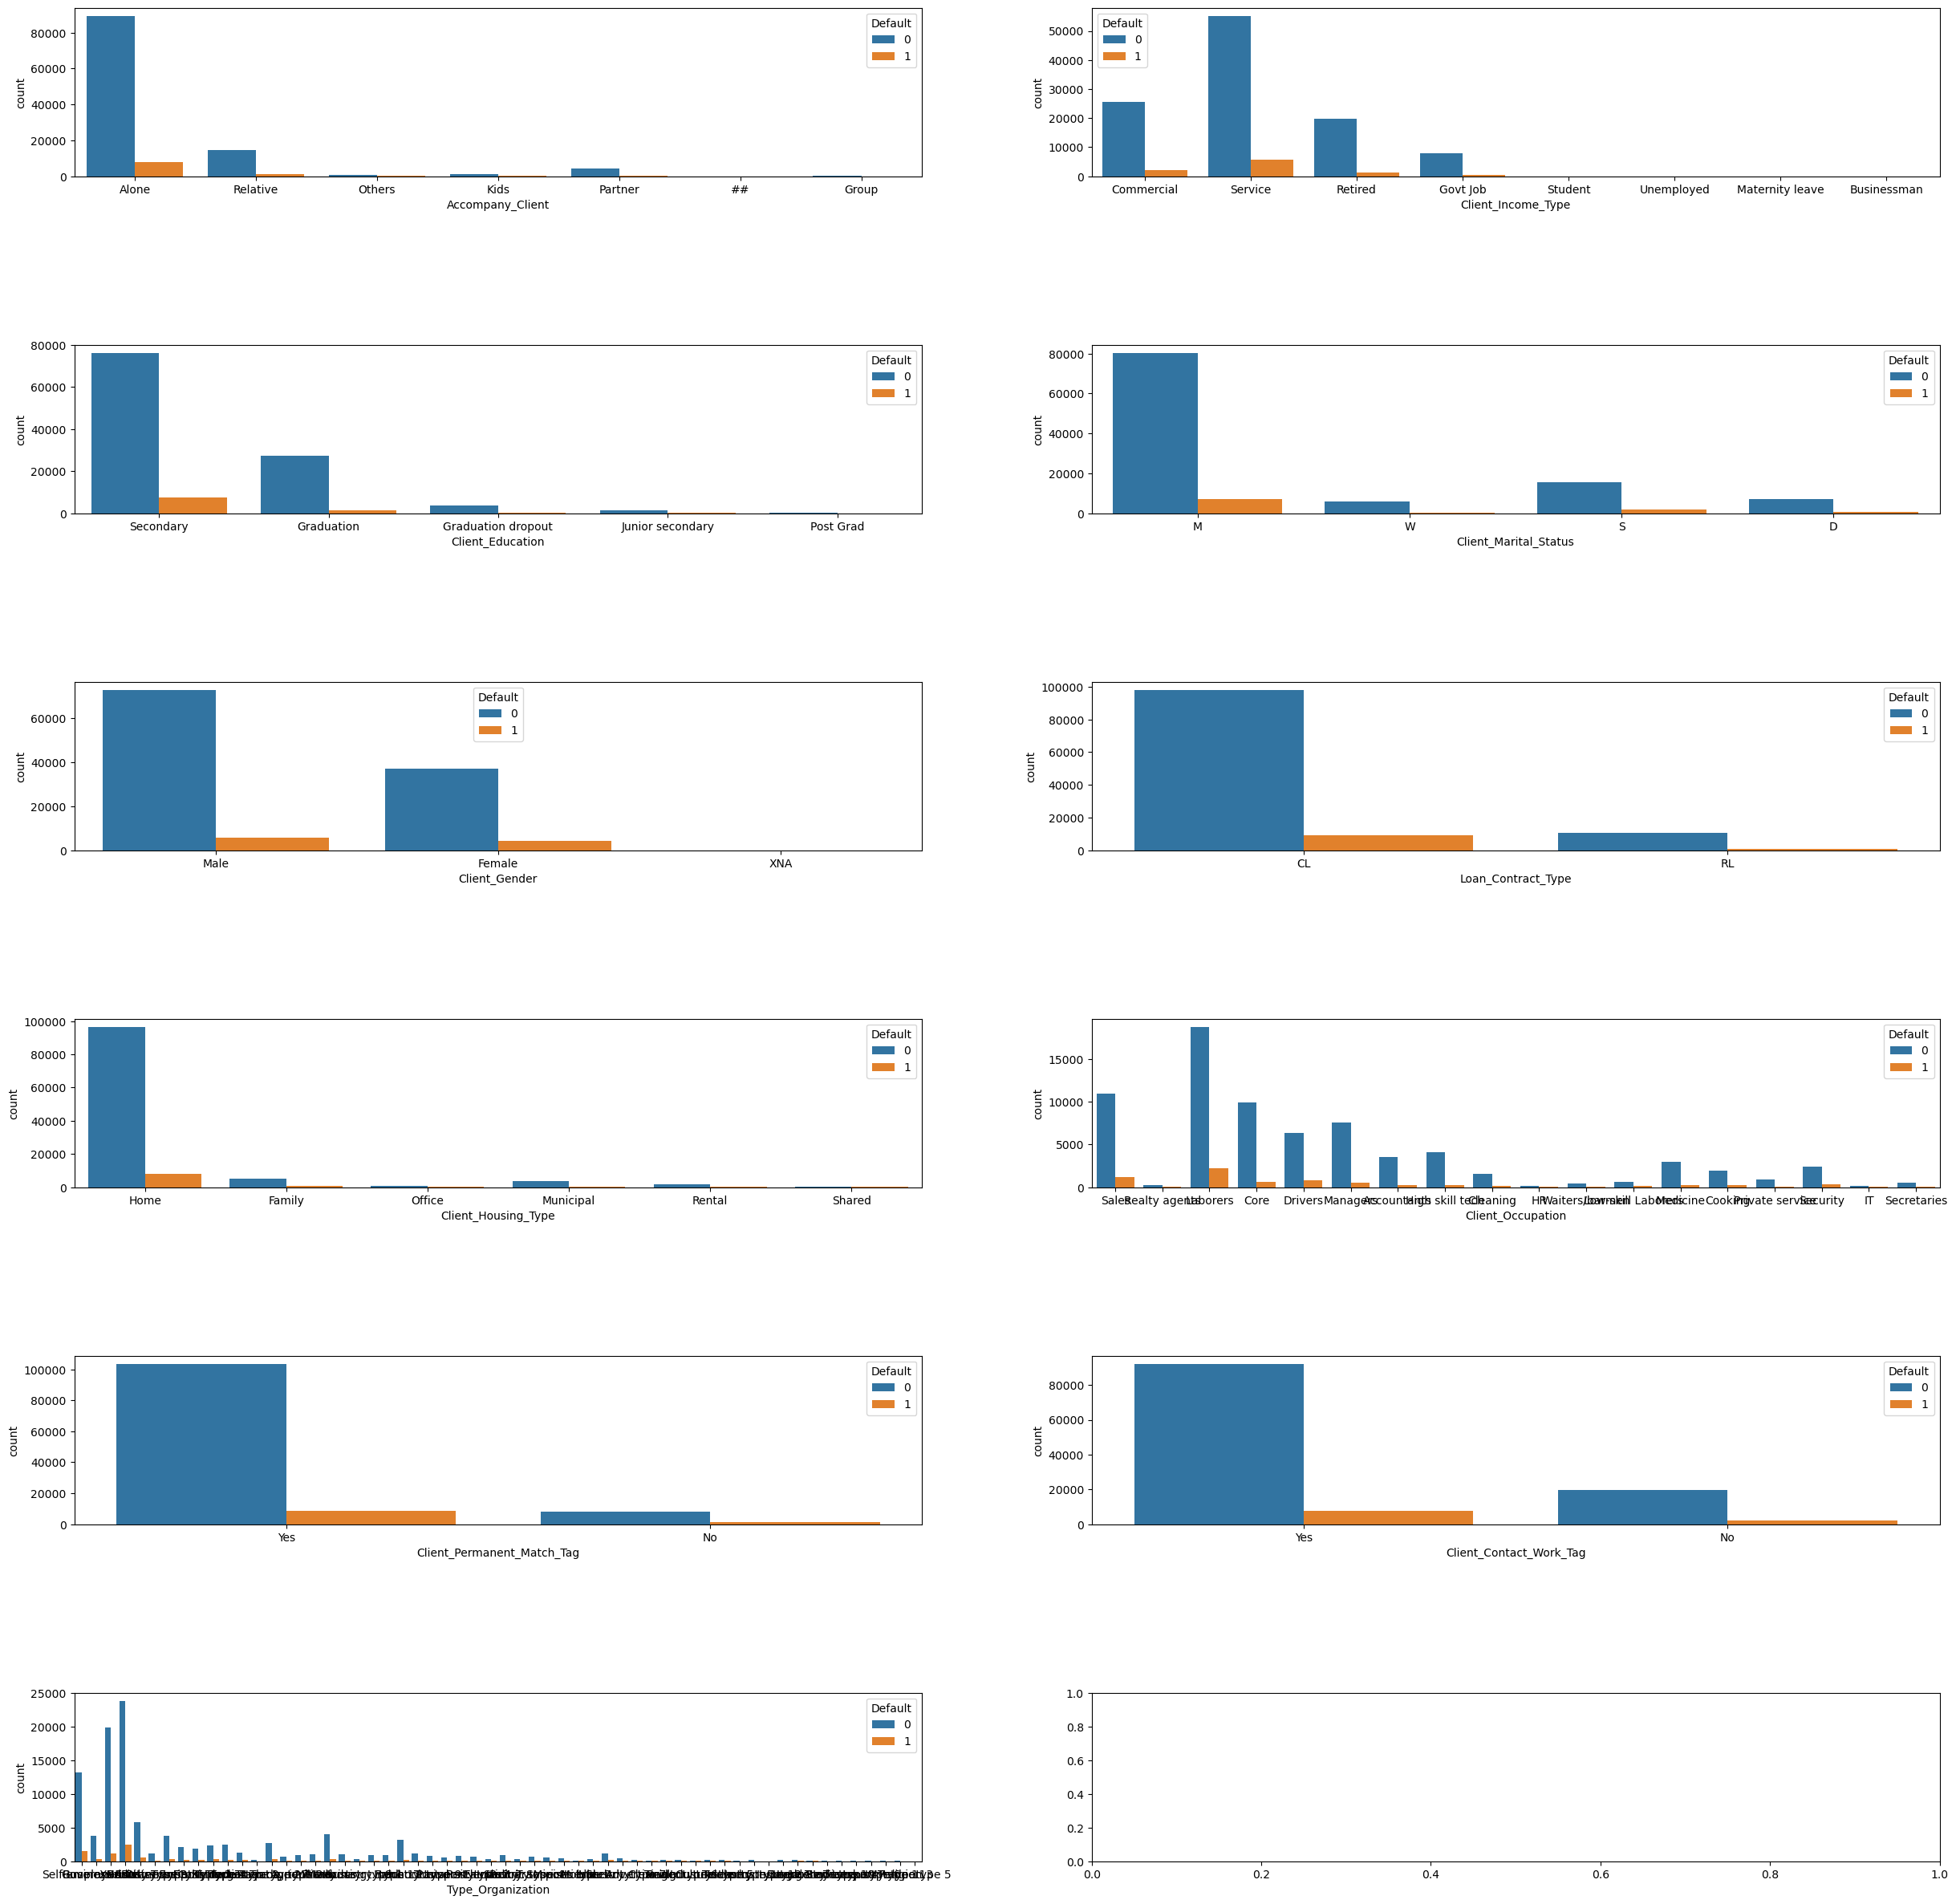

In [7]:
figure,axes = plt.subplots(6,2,figsize=(30,30))
for index,cat_col in enumerate(categorical_list):
    row,col = index//2,index%2
    sb.countplot(x=cat_col,data=df,hue='Default',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

### Data visualization for Numerical columns

TypeError: Horizontal orientation requires numeric `x` variable.

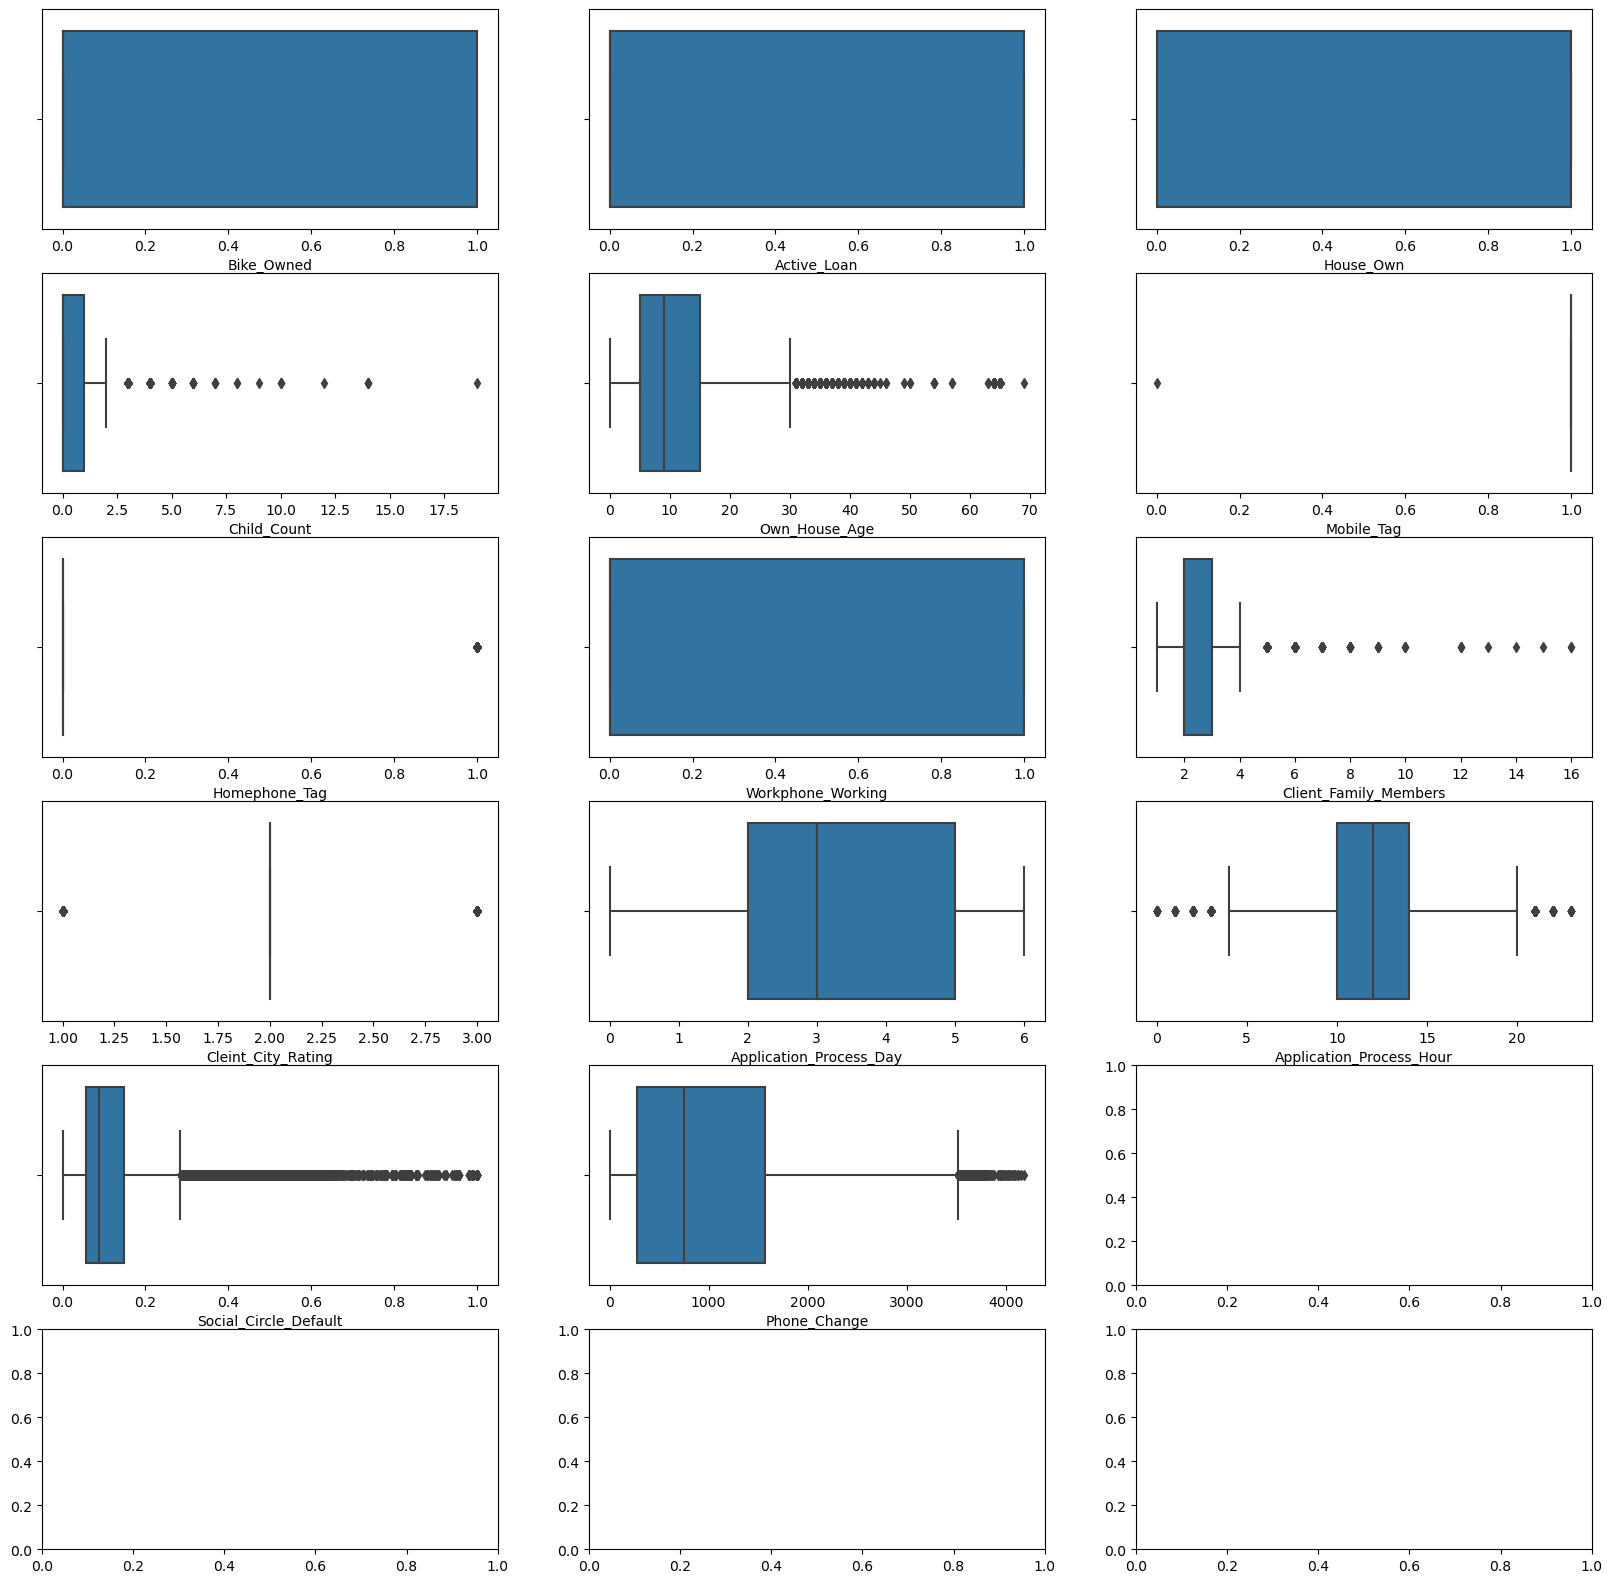

In [8]:
numeric=['Bike_Owned','Active_Loan', 'House_Own', 'Child_Count', 'Own_House_Age', 'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Client_Family_Members', 'Cleint_City_Rating', 'Application_Process_Day', 'Application_Process_Hour', 'Social_Circle_Default', 'Phone_Change', 'Client_Income', 'Credit_Amount', 'Loan_Annuity', 'Population_Region_Relative', 'Age_Days', 'Employed_Days', 'Registration_Days', 'ID_Days']

f, axes = plt.subplots(6,3,figsize=(20,20))  
y = 0
for name in numeric:
    i, j = divmod(y, 3)
    if i ==6 and j == 0:
        break
    sb.boxplot(x=initdf[name], ax=axes[i, j])
    y = y + 1

plt.tight_layout()
plt.show()


### convert object type columns to float type

In [9]:
for x in initdf:
    if x in toconvert_type_list:
        initdf[x] = pd.to_numeric(initdf[x],errors = 'coerce')
        numeric_list.append(x)

### get a list of categorical type columns

In [10]:
categ_dummy_list = [x for x in initdf if x in categorical_list]

### check columns with XNA values

In [11]:
totcount =0
count=0
t=0
for x in initdf:
    for xx in initdf[x]:
        if xx == 'XNA':
            if t==0:
                t =t+1
            count =count +1   
            totcount =totcount +1

### Drop 'Type_Organization' from initdf and categ_dummy_lis

In [12]:
initdf=initdf.drop(['Type_Organization'],axis=1)
categ_dummy_list.remove('Type_Organization')

### Remove rows with XNA values in gender column

In [13]:
initdf = initdf[initdf['Client_Gender'] != 'XNA']

### Check unique values of each categorical variables

In [14]:
count = sum(len(initdf[x].value_counts()) for x in categ_dummy_list)

### Reducing number of categories

In [15]:
def categorize_column(col):
    if col in ('Alone', 'Relative'):
        return col
    else:
        return 'Other'

initdf['Accompany_Client'] = initdf['Accompany_Client'].apply(categorize_column)

def categorize_column(col):
    if col in ('Service', 'Commercial', 'Retired', 'Unemployed', 'Student'):
        return col
    else:
        return 'Other'

initdf['Client_Income_Type'] = initdf['Client_Income_Type'].apply(categorize_column)

def categorize_column(col):
    if col in ('Secondary', 'Graduation'):
        return col
    else:
        return 'Other'

initdf['Client_Education'] = initdf['Client_Education'].apply(categorize_column)

initdf['Client_Housing_Type'] = initdf['Client_Housing_Type'].apply(lambda x: x if x == 'Home' else 'Other')

initdf['Client_Marital_Status'] = initdf['Client_Marital_Status'].apply(lambda x: x if x == 'M' else 'Other')

def categorize_column(col):
    if col in ('Laborers', 'Sales', 'Core', 'Managers', 'Drivers', 'High skill tech', 'Medicine'):
        return col
    else:
        return 'Other'

initdf['Client_Occupation'] = initdf['Client_Occupation'].apply(categorize_column)


count = sum(initdf[x].nunique() for x in categ_dummy_list)
print(count)

32


### Chcking Unique values

In [17]:
columns_to_check = ['Loan_Annuity', 'Phone_Change', 'Client_Education', 'Client_Occupation', 'Client_Gender', 'Client_Income_Type', 'Child_Count', 'Workphone_Working', 'Application_Process_Hour', 'Cleint_City_Rating', 'Homephone_Tag', 'Car_Owned']

for col in columns_to_check:
    print(initdf[col].unique())

[3416.85 1826.55 2788.2  ... 5411.7  2515.5  2989.35]
[  63.   nan  277. ... 3850. 3017. 3359.]
['Secondary' 'Graduation' 'Other']
['Sales' 'Other' 'Laborers' 'Core' 'Drivers' 'Managers' 'High skill tech'
 'Medicine']
['Male' 'Female' nan]
['Commercial' 'Service' 'Retired' 'Other' 'Student' 'Unemployed']
[ 0.  1.  2. nan  3.  4.  5.  7.  8. 10.  6. 19. 12. 14.  9.]
[0 1]
[17. 10. nan 15. 14. 13.  9. 12.  8. 16. 18. 11.  7. 19.  4. 21. 20.  6.
  3.  5.  2. 22.  0.  1. 23.]
[ 2.  3.  1. nan]
[1 0]
[ 0.  1. nan]


### fucntion to encode categorical variables

In [18]:
def encode_df(df, todummy_list):
    df_encoded = df.copy()
    df_encoded[todummy_list] = df[todummy_list].apply(lambda x: LabelEncoder().fit_transform(x))
    return df_encoded

### Creating a list of categorical values in necessary columns before encoding to use when labeling inputs

In [19]:
unique_values = {col: initdf[col].unique() for col in ['Client_Education', 'Client_Occupation', 'Client_Income_Type']}
print(unique_values)

{'Client_Education': array(['Secondary', 'Graduation', 'Other'], dtype=object), 'Client_Occupation': array(['Sales', 'Other', 'Laborers', 'Core', 'Drivers', 'Managers',
       'High skill tech', 'Medicine'], dtype=object), 'Client_Income_Type': array(['Commercial', 'Service', 'Retired', 'Other', 'Student',
       'Unemployed'], dtype=object)}


### Encoding

In [20]:
initdf[categ_dummy_list] = initdf[categ_dummy_list].apply(LabelEncoder().fit_transform)

### Creating a list of categorical values in necessary columns After encoding to use when labeling inputs

In [21]:
education_label = list(initdf['Client_Education'].drop_duplicates())
occupation_label = list(initdf['Client_Occupation'].drop_duplicates())
income_type_label = list(initdf['Client_Income_Type'].drop_duplicates())

In [22]:
print(income_type_label)

[0, 3, 2, 1, 4, 5]


### Handle missing values
### missing data count

In [23]:
initdf.isnull().sum().sort_values(ascending=False).head()

Own_House_Age                 80093
Social_Circle_Default         61928
ID_Days                        5985
Population_Region_Relative     4867
Loan_Annuity                   4826
dtype: int64

### Remove columns which has null values more than 30%

In [27]:
# Determine the proportion of missing values in every column as a percentage
null_percentages = initdf.isnull().sum() / len(initdf.index)

# Pinpoint columns that have over 30% of missing values
cols_to_drop = null_percentages[null_percentages > 0.3].index.tolist()

# Eliminate the identified columns and display the count of missing values in each column
initdf = initdf.drop(cols_to_drop, axis=1)
for col in cols_to_drop:
    print("Dropped column '", col, "' and total number of null values:", initdf[col].isnull().sum())

### Using Imputer in sklearn.preprocessing, impute missing values

In [26]:
impute = SimpleImputer(strategy='mean')
impute.fit(initdf)
initdf = pd.DataFrame(data=impute.transform(initdf),columns=initdf.columns)
print(initdf)

        Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  \
0              6750.0        0.0         0.0     1.000000   0.000000   
1             20250.0        1.0         0.0     1.000000   0.692052   
2             18000.0        0.0         0.0     1.000000   0.000000   
3             15750.0        0.0         0.0     1.000000   1.000000   
4             33750.0        1.0         0.0     1.000000   0.000000   
...               ...        ...         ...          ...        ...   
121848        29250.0        0.0         0.0     0.499171   1.000000   
121849        15750.0        0.0         1.0     1.000000   0.000000   
121850         8100.0        0.0         1.0     0.000000   1.000000   
121851        38250.0        1.0         1.0     0.000000   1.000000   
121852         9000.0        1.0         1.0     1.000000   1.000000   

        Child_Count  Credit_Amount  Loan_Annuity  Accompany_Client  \
0               0.0       61190.55       3416.85               0.

### Convert days to years

In [28]:
days = ['Age_Days','Employed_Days','Registration_Days','ID_Days','Phone_Change']
for var in days:
    initdf[var] = [math.ceil(x/365) if x != '' else null for x in initdf[var]]

### Investigate all the variabl's max and min values


In [29]:
print(initdf.agg(['max', 'min']).T[['max', 'min']].rename(columns={'max': 'Max', 'min': 'Min'}))

                                  Max          Min
Client_Income               1800009.0  2565.000000
Car_Owned                         1.0     0.000000
Bike_Owned                        1.0     0.000000
Active_Loan                       1.0     0.000000
House_Own                         1.0     0.000000
Child_Count                      19.0     0.000000
Credit_Amount                405000.0  4500.000000
Loan_Annuity                  22500.0   217.350000
Accompany_Client                  2.0     0.000000
Client_Income_Type                5.0     0.000000
Client_Education                  2.0     0.000000
Client_Marital_Status             1.0     0.000000
Client_Gender                     2.0     0.000000
Loan_Contract_Type                2.0     0.000000
Client_Housing_Type               1.0     0.000000
Population_Region_Relative      100.0     0.000533
Age_Days                         70.0    22.000000
Employed_Days                  1001.0     0.000000
Registration_Days              

### Remove unwanted rows 


In [30]:
#Population_Region_Relative values must be between 1-0
val = len(initdf[initdf['Population_Region_Relative'] > 1])
initdf = initdf[initdf['Population_Region_Relative'] <= 1]   

In [31]:
val=0
for col in initdf['Employed_Days']:
    if col>100:
        val+=1 

In [42]:
initdf=initdf.drop(columns=['Employed_Days'])

### Correlations between variables

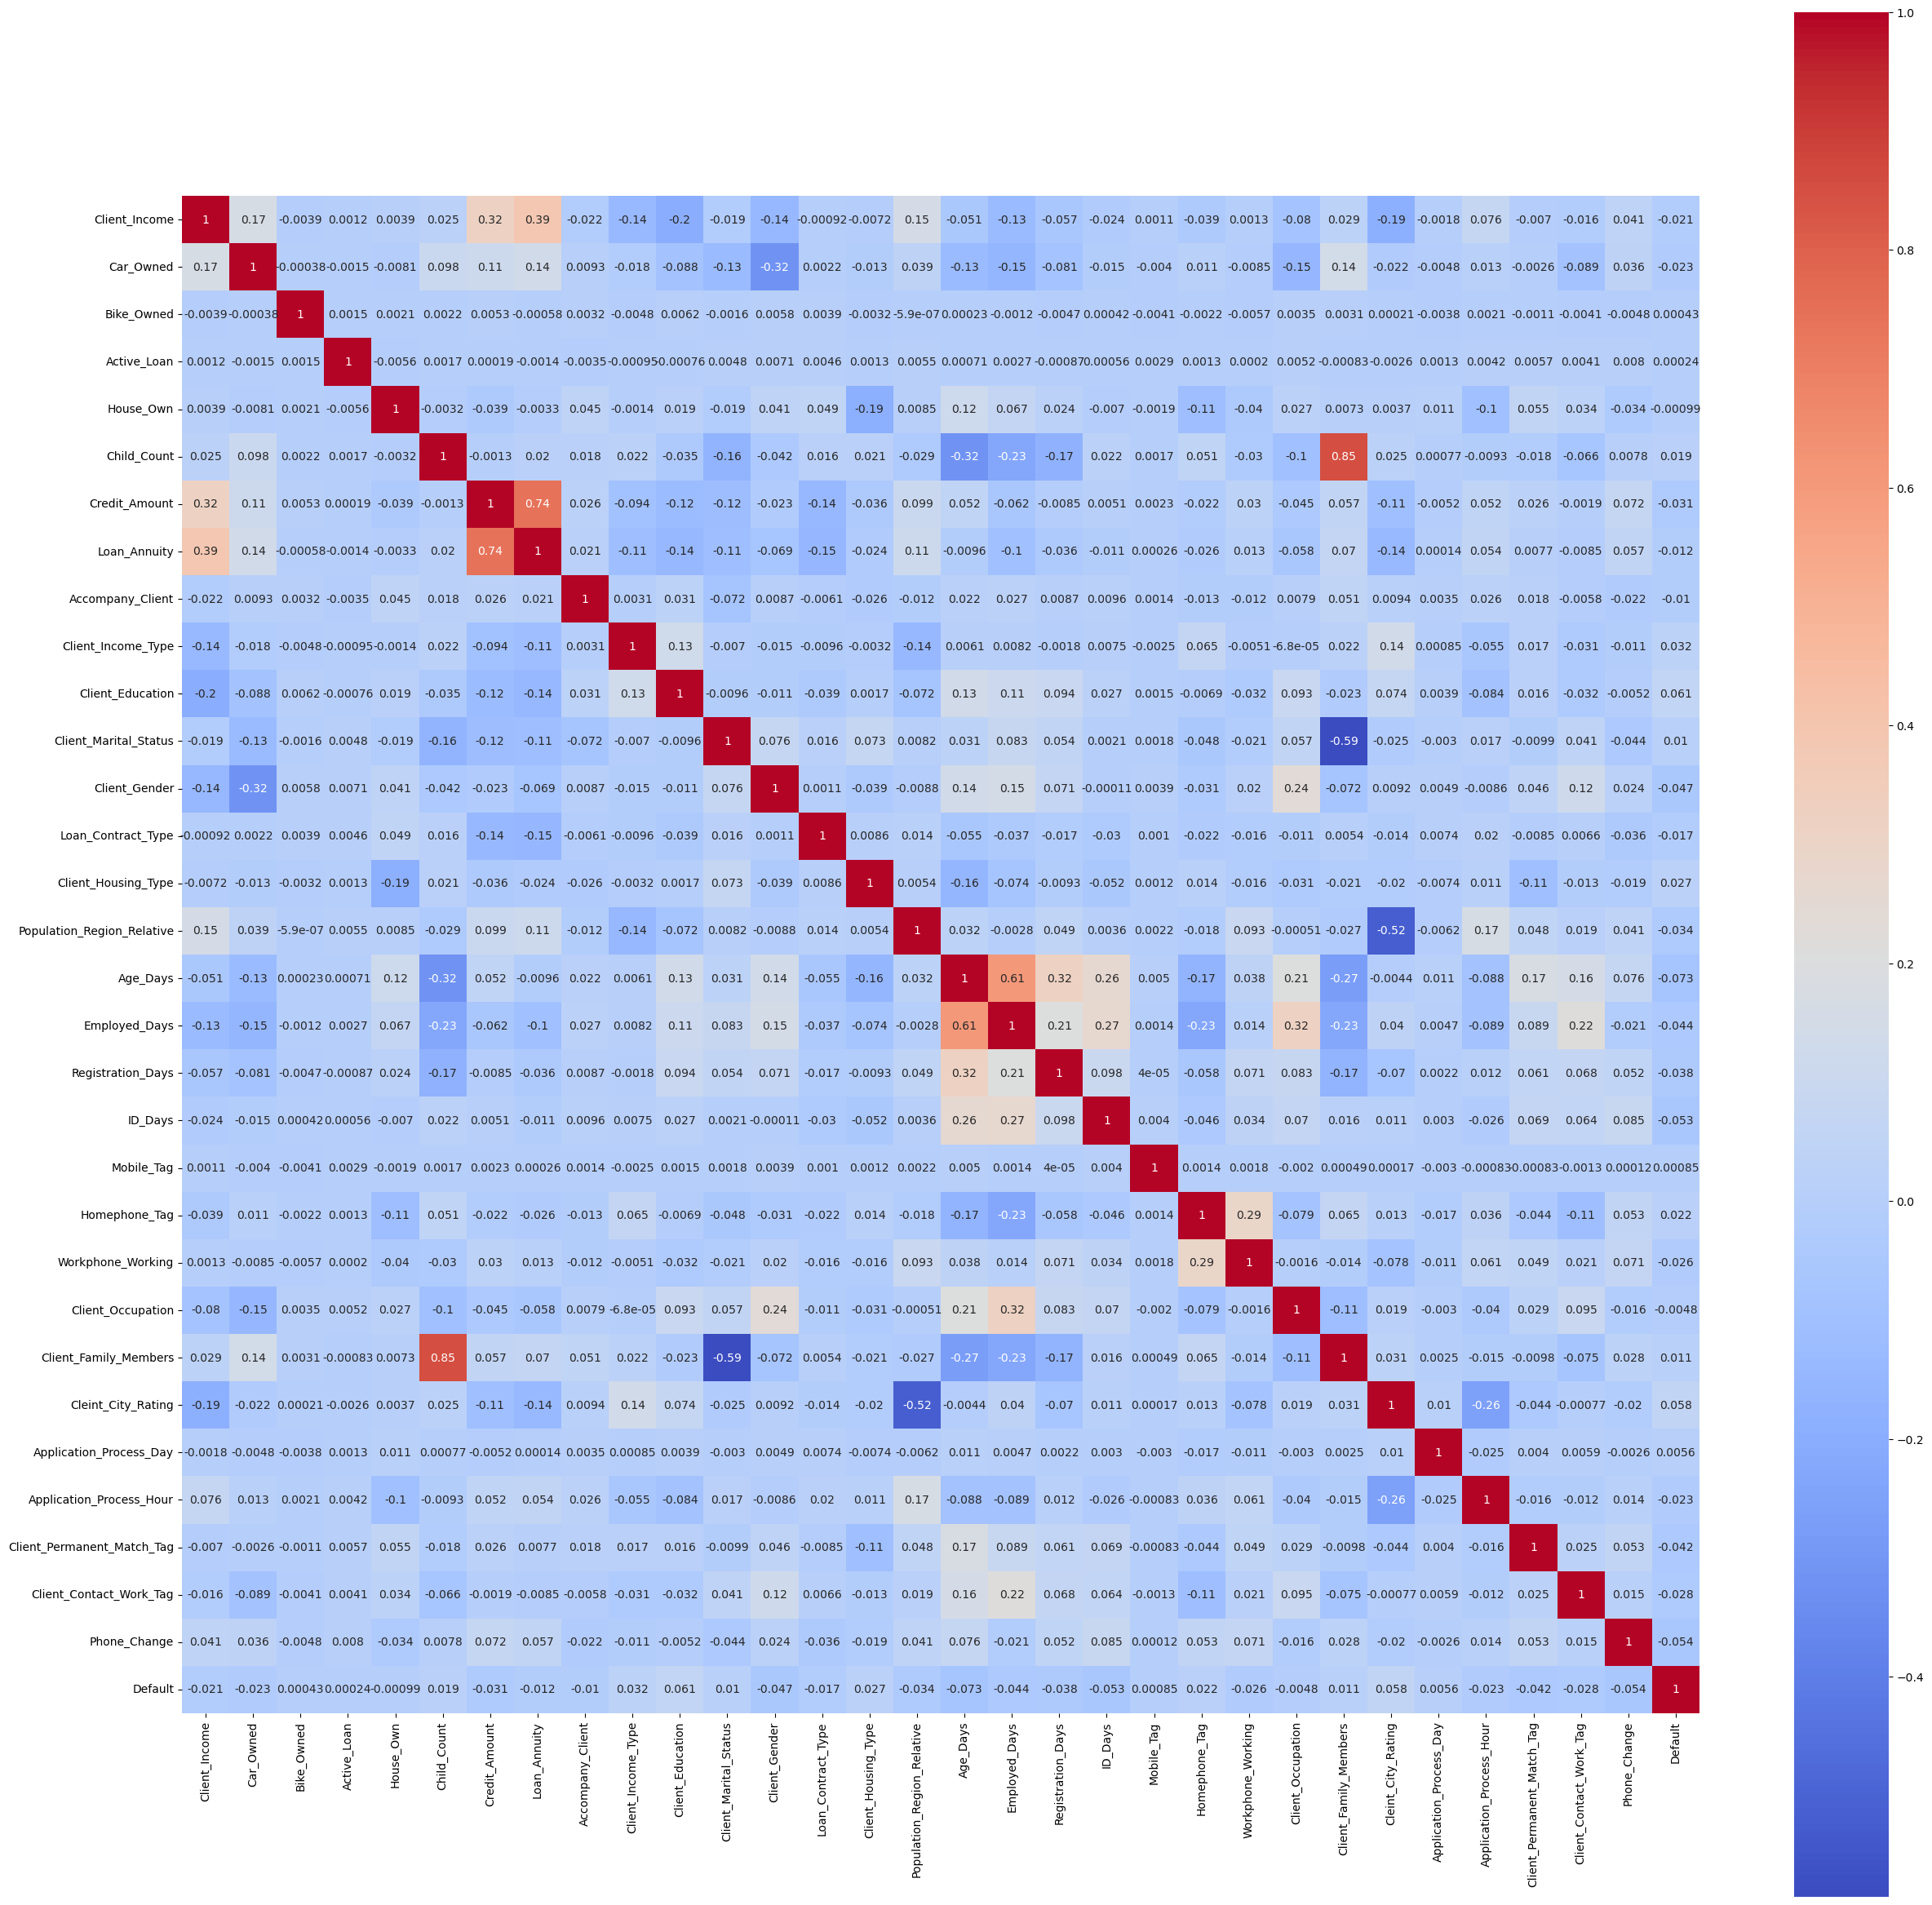

In [32]:
#Correlations between variables
plt.figure(figsize=(30,30))
sb.heatmap(initdf.corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

#### Function to get variables which has grater than value of Correlations for given threshold value 

In [33]:
def correlation(dataset, threshold):
    col_correlation = set() 
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_correlation.add(colname)
    return col_correlation

In [34]:
correlation_features = correlation(initdf, 0.5)
correlation_features

{'Cleint_City_Rating',
 'Client_Family_Members',
 'Employed_Days',
 'Loan_Annuity'}

### Selecting the best Features

In [35]:
X = initdf.iloc[:,:-1]  
y = initdf.iloc[:,-1]    
#Utilize the SelectKBest class to extract the most outstanding features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#Combine two dataframes to improve the clarity of the presentation
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
topfeatures=featureScores.nlargest(20,'Score')

### Get final data set with top 17 best features with class variable

In [36]:
Finaldf=initdf[['Credit_Amount','Client_Income','Loan_Annuity','Age_Days','Phone_Change','ID_Days','Client_Education','Client_Occupation','Client_Gender','Client_Income_Type','Child_Count','Workphone_Working','Application_Process_Hour','Cleint_City_Rating','Homephone_Tag','Car_Owned' , 'Registration_Days','Default']]
Finaldf.head()

,Credit_Amount,Client_Income,Loan_Annuity,Age_Days,Phone_Change,ID_Days,Client_Education,Client_Occupation,Client_Gender,Client_Income_Type,Child_Count,Workphone_Working,Application_Process_Hour,Cleint_City_Rating,Homephone_Tag,Car_Owned,Registration_Days,Default
0,61190.55,6750.0,3416.85,39,1,2,2.0,7.0,1.0,0.0,0.0,0.0,17.000000,2.0,1.0,0.0,17,0.0
1,15282.00,20250.0,1826.55,39,3,1,0.0,6.0,1.0,3.0,0.0,1.0,10.000000,2.0,0.0,1.0,22,0.0
2,59527.35,18000.0,2788.20,46,1,1,1.0,6.0,1.0,3.0,1.0,0.0,12.063017,2.0,0.0,0.0,14,0.0
3,53870.40,15750.0,2295.45,64,5,3,2.0,6.0,1.0,2.0,0.0,0.0,15.000000,3.0,0.0,0.0,14,0.0
4,133988.40,33750.0,3547.35,32,2,12,2.0,3.0,0.0,0.0,2.0,0.0,12.063017,1.0,0.0,1.0,16,0.0


# K Nearest Neighbours Classifier

### Create the data

In [37]:
X = Finaldf.drop('Default', axis=1).values# Input features (attributes)
y = Finaldf['Default'].values # Target vector
print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

X shape: (121851, 17)
y shape: (121851,)


### Using Undersampling to balance the class distribution

In [38]:
from imblearn.under_sampling import RandomUnderSampler 

under = RandomUnderSampler()
X, y = under.fit_resample(X, y)

### Split the dataset into training set & testing set

In [39]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.3)

### Instantiate and fit model

In [40]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier(leaf_size= 1, n_neighbors= 1, p= 1)
model.fit(x_train,y_train)

print("Training Accuracy is: ", model.score(x_train, y_train))
print("Testing Accuracy is: ", model.score(x_test, y_test))

Training Accuracy is:  1.0
Testing Accuracy is:  0.5828677839851024


In [41]:
prediction_test = model.predict(x_test)
classes = ['Not Default','Default']
def plot_confusionmatrix(pred,test,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(pred,test)
    sb.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()    

## Confusion Matrix

Test Confusion matrix


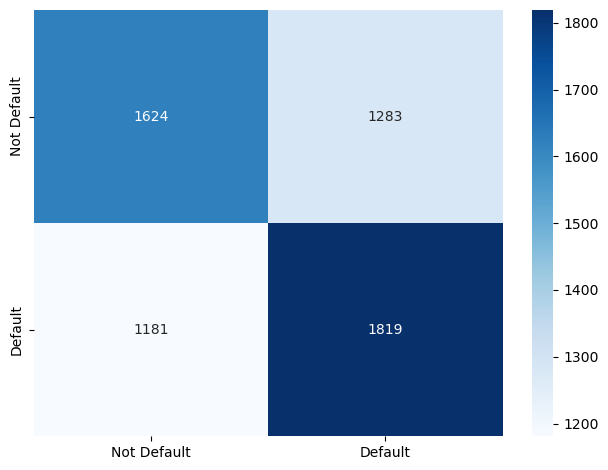

In [42]:
plot_confusionmatrix(y_test,prediction_test,dom='Test')

In [43]:
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

         0.0       0.58      0.56      0.57      2907
         1.0       0.59      0.61      0.60      3000

    accuracy                           0.58      5907
   macro avg       0.58      0.58      0.58      5907
weighted avg       0.58      0.58      0.58      5907



In [44]:
cross_val_score(model,X,y,cv=20)

array([0.58274112, 0.55837563, 0.58680203, 0.57461929, 0.58172589,
       0.60609137, 0.58274112, 0.57461929, 0.58781726, 0.57664975,
       0.58231707, 0.60772358, 0.57825203, 0.59349593, 0.61382114,
       0.5995935 , 0.6046748 , 0.6046748 , 0.60569106, 0.56300813])

# Hyper parameter Tuning

In [45]:
# create the data

# Input features
X = Finaldf.drop('Default', axis=1).values

# Target vector
y = Finaldf['Default'].values 

print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

X shape: (121851, 17)
y shape: (121851,)


In [46]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

In [47]:
# Create the param grid
import random
param_grid = {'leaf_size': leaf_size,
               'n_neighbors': n_neighbors,
               'p' : p}

print(param_grid)

{'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'p': [1, 2]}


In [48]:
#Instantiate and fit model
model = KNeighborsClassifier()

In [49]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = 10, verbose=2, n_jobs = 1)

In [50]:
rf_Grid.fit(x_train, y_train)

Fitting 10 folds for each of 2842 candidates, totalling 28420 fits
[CV] END ....................leaf_size=1, n_neighbors=1, p=1; total time=   0.1s
[CV] END ....................leaf_size=1, n_neighbors=1, p=1; total time=   0.0s
[CV] END ....................leaf_size=1, n_neighbors=1, p=1; total time=   0.0s
[CV] END ....................leaf_size=1, n_neighbors=1, p=1; total time=   0.1s
[CV] END ....................leaf_size=1, n_neighbors=1, p=1; total time=   0.0s
[CV] END ....................leaf_size=1, n_neighbors=1, p=1; total time=   0.0s
[CV] END ....................leaf_size=1, n_neighbors=1, p=1; total time=   0.1s
[CV] END ....................leaf_size=1, n_neighbors=1, p=1; total time=   0.1s
[CV] END ....................leaf_size=1, n_neighbors=1, p=1; total time=   0.1s
[CV] END ....................leaf_size=1, n_neighbors=1, p=1; total time=   0.1s
[CV] END ....................leaf_size=1, n_neighbors=1, p=2; total time=   0.1s
[CV] END ....................leaf_size=1, 

[CV] END ....................leaf_size=1, n_neighbors=6, p=1; total time=   0.1s
[CV] END ....................leaf_size=1, n_neighbors=6, p=1; total time=   0.1s
[CV] END ....................leaf_size=1, n_neighbors=6, p=1; total time=   0.1s
[CV] END ....................leaf_size=1, n_neighbors=6, p=1; total time=   0.1s
[CV] END ....................leaf_size=1, n_neighbors=6, p=1; total time=   0.1s
[CV] END ....................leaf_size=1, n_neighbors=6, p=1; total time=   0.1s
[CV] END ....................leaf_size=1, n_neighbors=6, p=1; total time=   0.1s
[CV] END ....................leaf_size=1, n_neighbors=6, p=1; total time=   0.1s
[CV] END ....................leaf_size=1, n_neighbors=6, p=1; total time=   0.1s
[CV] END ....................leaf_size=1, n_neighbors=6, p=2; total time=   0.1s
[CV] END ....................leaf_size=1, n_neighbors=6, p=2; total time=   0.1s
[CV] END ....................leaf_size=1, n_neighbors=6, p=2; total time=   0.1s
[CV] END ...................

[CV] END ...................leaf_size=1, n_neighbors=11, p=1; total time=   0.1s
[CV] END ...................leaf_size=1, n_neighbors=11, p=1; total time=   0.1s
[CV] END ...................leaf_size=1, n_neighbors=11, p=1; total time=   0.2s
[CV] END ...................leaf_size=1, n_neighbors=11, p=1; total time=   0.1s
[CV] END ...................leaf_size=1, n_neighbors=11, p=1; total time=   0.1s
[CV] END ...................leaf_size=1, n_neighbors=11, p=1; total time=   0.1s
[CV] END ...................leaf_size=1, n_neighbors=11, p=1; total time=   0.1s
[CV] END ...................leaf_size=1, n_neighbors=11, p=2; total time=   0.1s
[CV] END ...................leaf_size=1, n_neighbors=11, p=2; total time=   0.1s
[CV] END ...................leaf_size=1, n_neighbors=11, p=2; total time=   0.1s
[CV] END ...................leaf_size=1, n_neighbors=11, p=2; total time=   0.1s
[CV] END ...................leaf_size=1, n_neighbors=11, p=2; total time=   0.1s
[CV] END ...................

[CV] END ...................leaf_size=1, n_neighbors=16, p=1; total time=   0.1s
[CV] END ...................leaf_size=1, n_neighbors=16, p=1; total time=   0.1s
[CV] END ...................leaf_size=1, n_neighbors=16, p=1; total time=   0.2s
[CV] END ...................leaf_size=1, n_neighbors=16, p=1; total time=   0.1s
[CV] END ...................leaf_size=1, n_neighbors=16, p=1; total time=   0.2s
[CV] END ...................leaf_size=1, n_neighbors=16, p=2; total time=   0.1s
[CV] END ...................leaf_size=1, n_neighbors=16, p=2; total time=   0.1s
[CV] END ...................leaf_size=1, n_neighbors=16, p=2; total time=   0.1s
[CV] END ...................leaf_size=1, n_neighbors=16, p=2; total time=   0.1s
[CV] END ...................leaf_size=1, n_neighbors=16, p=2; total time=   0.1s
[CV] END ...................leaf_size=1, n_neighbors=16, p=2; total time=   0.1s
[CV] END ...................leaf_size=1, n_neighbors=16, p=2; total time=   0.1s
[CV] END ...................

[CV] END ...................leaf_size=1, n_neighbors=21, p=1; total time=   0.3s
[CV] END ...................leaf_size=1, n_neighbors=21, p=1; total time=   0.3s
[CV] END ...................leaf_size=1, n_neighbors=21, p=1; total time=   0.3s
[CV] END ...................leaf_size=1, n_neighbors=21, p=2; total time=   0.1s
[CV] END ...................leaf_size=1, n_neighbors=21, p=2; total time=   0.1s
[CV] END ...................leaf_size=1, n_neighbors=21, p=2; total time=   0.2s
[CV] END ...................leaf_size=1, n_neighbors=21, p=2; total time=   0.1s
[CV] END ...................leaf_size=1, n_neighbors=21, p=2; total time=   0.1s
[CV] END ...................leaf_size=1, n_neighbors=21, p=2; total time=   0.1s
[CV] END ...................leaf_size=1, n_neighbors=21, p=2; total time=   0.1s
[CV] END ...................leaf_size=1, n_neighbors=21, p=2; total time=   0.1s
[CV] END ...................leaf_size=1, n_neighbors=21, p=2; total time=   0.1s
[CV] END ...................

[CV] END ...................leaf_size=1, n_neighbors=26, p=1; total time=   0.2s
[CV] END ...................leaf_size=1, n_neighbors=26, p=2; total time=   0.1s
[CV] END ...................leaf_size=1, n_neighbors=26, p=2; total time=   0.1s
[CV] END ...................leaf_size=1, n_neighbors=26, p=2; total time=   0.1s
[CV] END ...................leaf_size=1, n_neighbors=26, p=2; total time=   0.1s
[CV] END ...................leaf_size=1, n_neighbors=26, p=2; total time=   0.1s
[CV] END ...................leaf_size=1, n_neighbors=26, p=2; total time=   0.1s
[CV] END ...................leaf_size=1, n_neighbors=26, p=2; total time=   0.1s
[CV] END ...................leaf_size=1, n_neighbors=26, p=2; total time=   0.1s
[CV] END ...................leaf_size=1, n_neighbors=26, p=2; total time=   0.1s
[CV] END ...................leaf_size=1, n_neighbors=26, p=2; total time=   0.1s
[CV] END ...................leaf_size=1, n_neighbors=27, p=1; total time=   0.2s
[CV] END ...................

[CV] END ....................leaf_size=2, n_neighbors=2, p=2; total time=   0.1s
[CV] END ....................leaf_size=2, n_neighbors=2, p=2; total time=   0.1s
[CV] END ....................leaf_size=2, n_neighbors=2, p=2; total time=   0.1s
[CV] END ....................leaf_size=2, n_neighbors=2, p=2; total time=   0.1s
[CV] END ....................leaf_size=2, n_neighbors=2, p=2; total time=   0.1s
[CV] END ....................leaf_size=2, n_neighbors=2, p=2; total time=   0.1s
[CV] END ....................leaf_size=2, n_neighbors=2, p=2; total time=   0.1s
[CV] END ....................leaf_size=2, n_neighbors=2, p=2; total time=   0.1s
[CV] END ....................leaf_size=2, n_neighbors=2, p=2; total time=   0.1s
[CV] END ....................leaf_size=2, n_neighbors=3, p=1; total time=   0.1s
[CV] END ....................leaf_size=2, n_neighbors=3, p=1; total time=   0.1s
[CV] END ....................leaf_size=2, n_neighbors=3, p=1; total time=   0.1s
[CV] END ...................

[CV] END ....................leaf_size=2, n_neighbors=7, p=2; total time=   0.1s
[CV] END ....................leaf_size=2, n_neighbors=7, p=2; total time=   0.1s
[CV] END ....................leaf_size=2, n_neighbors=7, p=2; total time=   0.1s
[CV] END ....................leaf_size=2, n_neighbors=7, p=2; total time=   0.1s
[CV] END ....................leaf_size=2, n_neighbors=7, p=2; total time=   0.1s
[CV] END ....................leaf_size=2, n_neighbors=7, p=2; total time=   0.1s
[CV] END ....................leaf_size=2, n_neighbors=7, p=2; total time=   0.1s
[CV] END ....................leaf_size=2, n_neighbors=8, p=1; total time=   0.1s
[CV] END ....................leaf_size=2, n_neighbors=8, p=1; total time=   0.1s
[CV] END ....................leaf_size=2, n_neighbors=8, p=1; total time=   0.1s
[CV] END ....................leaf_size=2, n_neighbors=8, p=1; total time=   0.2s
[CV] END ....................leaf_size=2, n_neighbors=8, p=1; total time=   0.1s
[CV] END ...................

[CV] END ...................leaf_size=2, n_neighbors=12, p=2; total time=   0.1s
[CV] END ...................leaf_size=2, n_neighbors=12, p=2; total time=   0.1s
[CV] END ...................leaf_size=2, n_neighbors=12, p=2; total time=   0.1s
[CV] END ...................leaf_size=2, n_neighbors=12, p=2; total time=   0.1s
[CV] END ...................leaf_size=2, n_neighbors=12, p=2; total time=   0.1s
[CV] END ...................leaf_size=2, n_neighbors=13, p=1; total time=   0.1s
[CV] END ...................leaf_size=2, n_neighbors=13, p=1; total time=   0.1s
[CV] END ...................leaf_size=2, n_neighbors=13, p=1; total time=   0.1s
[CV] END ...................leaf_size=2, n_neighbors=13, p=1; total time=   0.1s
[CV] END ...................leaf_size=2, n_neighbors=13, p=1; total time=   0.1s
[CV] END ...................leaf_size=2, n_neighbors=13, p=1; total time=   0.2s
[CV] END ...................leaf_size=2, n_neighbors=13, p=1; total time=   0.2s
[CV] END ...................

[CV] END ...................leaf_size=2, n_neighbors=17, p=2; total time=   0.1s
[CV] END ...................leaf_size=2, n_neighbors=17, p=2; total time=   0.1s
[CV] END ...................leaf_size=2, n_neighbors=17, p=2; total time=   0.1s
[CV] END ...................leaf_size=2, n_neighbors=18, p=1; total time=   0.2s
[CV] END ...................leaf_size=2, n_neighbors=18, p=1; total time=   0.2s
[CV] END ...................leaf_size=2, n_neighbors=18, p=1; total time=   0.2s
[CV] END ...................leaf_size=2, n_neighbors=18, p=1; total time=   0.2s
[CV] END ...................leaf_size=2, n_neighbors=18, p=1; total time=   0.2s
[CV] END ...................leaf_size=2, n_neighbors=18, p=1; total time=   0.1s
[CV] END ...................leaf_size=2, n_neighbors=18, p=1; total time=   0.1s
[CV] END ...................leaf_size=2, n_neighbors=18, p=1; total time=   0.1s
[CV] END ...................leaf_size=2, n_neighbors=18, p=1; total time=   0.1s
[CV] END ...................

[CV] END ...................leaf_size=2, n_neighbors=22, p=2; total time=   0.1s
[CV] END ...................leaf_size=2, n_neighbors=23, p=1; total time=   0.2s
[CV] END ...................leaf_size=2, n_neighbors=23, p=1; total time=   0.2s
[CV] END ...................leaf_size=2, n_neighbors=23, p=1; total time=   0.2s
[CV] END ...................leaf_size=2, n_neighbors=23, p=1; total time=   0.2s
[CV] END ...................leaf_size=2, n_neighbors=23, p=1; total time=   0.1s
[CV] END ...................leaf_size=2, n_neighbors=23, p=1; total time=   0.1s
[CV] END ...................leaf_size=2, n_neighbors=23, p=1; total time=   0.1s
[CV] END ...................leaf_size=2, n_neighbors=23, p=1; total time=   0.2s
[CV] END ...................leaf_size=2, n_neighbors=23, p=1; total time=   0.2s
[CV] END ...................leaf_size=2, n_neighbors=23, p=1; total time=   0.2s
[CV] END ...................leaf_size=2, n_neighbors=23, p=2; total time=   0.1s
[CV] END ...................

[CV] END ...................leaf_size=2, n_neighbors=28, p=1; total time=   0.1s
[CV] END ...................leaf_size=2, n_neighbors=28, p=1; total time=   0.1s
[CV] END ...................leaf_size=2, n_neighbors=28, p=1; total time=   0.1s
[CV] END ...................leaf_size=2, n_neighbors=28, p=1; total time=   0.2s
[CV] END ...................leaf_size=2, n_neighbors=28, p=1; total time=   0.1s
[CV] END ...................leaf_size=2, n_neighbors=28, p=1; total time=   0.2s
[CV] END ...................leaf_size=2, n_neighbors=28, p=1; total time=   0.2s
[CV] END ...................leaf_size=2, n_neighbors=28, p=1; total time=   0.2s
[CV] END ...................leaf_size=2, n_neighbors=28, p=1; total time=   0.2s
[CV] END ...................leaf_size=2, n_neighbors=28, p=2; total time=   0.1s
[CV] END ...................leaf_size=2, n_neighbors=28, p=2; total time=   0.1s
[CV] END ...................leaf_size=2, n_neighbors=28, p=2; total time=   0.1s
[CV] END ...................

[CV] END ....................leaf_size=3, n_neighbors=4, p=1; total time=   0.1s
[CV] END ....................leaf_size=3, n_neighbors=4, p=1; total time=   0.1s
[CV] END ....................leaf_size=3, n_neighbors=4, p=1; total time=   0.1s
[CV] END ....................leaf_size=3, n_neighbors=4, p=1; total time=   0.1s
[CV] END ....................leaf_size=3, n_neighbors=4, p=1; total time=   0.1s
[CV] END ....................leaf_size=3, n_neighbors=4, p=1; total time=   0.1s
[CV] END ....................leaf_size=3, n_neighbors=4, p=1; total time=   0.1s
[CV] END ....................leaf_size=3, n_neighbors=4, p=2; total time=   0.1s
[CV] END ....................leaf_size=3, n_neighbors=4, p=2; total time=   0.1s
[CV] END ....................leaf_size=3, n_neighbors=4, p=2; total time=   0.1s
[CV] END ....................leaf_size=3, n_neighbors=4, p=2; total time=   0.1s
[CV] END ....................leaf_size=3, n_neighbors=4, p=2; total time=   0.1s
[CV] END ...................

[CV] END ....................leaf_size=3, n_neighbors=9, p=1; total time=   0.1s
[CV] END ....................leaf_size=3, n_neighbors=9, p=1; total time=   0.1s
[CV] END ....................leaf_size=3, n_neighbors=9, p=1; total time=   0.1s
[CV] END ....................leaf_size=3, n_neighbors=9, p=1; total time=   0.1s
[CV] END ....................leaf_size=3, n_neighbors=9, p=1; total time=   0.1s
[CV] END ....................leaf_size=3, n_neighbors=9, p=2; total time=   0.1s
[CV] END ....................leaf_size=3, n_neighbors=9, p=2; total time=   0.1s
[CV] END ....................leaf_size=3, n_neighbors=9, p=2; total time=   0.1s
[CV] END ....................leaf_size=3, n_neighbors=9, p=2; total time=   0.1s
[CV] END ....................leaf_size=3, n_neighbors=9, p=2; total time=   0.1s
[CV] END ....................leaf_size=3, n_neighbors=9, p=2; total time=   0.1s
[CV] END ....................leaf_size=3, n_neighbors=9, p=2; total time=   0.1s
[CV] END ...................

[CV] END ...................leaf_size=3, n_neighbors=14, p=1; total time=   0.1s
[CV] END ...................leaf_size=3, n_neighbors=14, p=1; total time=   0.1s
[CV] END ...................leaf_size=3, n_neighbors=14, p=1; total time=   0.2s
[CV] END ...................leaf_size=3, n_neighbors=14, p=2; total time=   0.1s
[CV] END ...................leaf_size=3, n_neighbors=14, p=2; total time=   0.1s
[CV] END ...................leaf_size=3, n_neighbors=14, p=2; total time=   0.1s
[CV] END ...................leaf_size=3, n_neighbors=14, p=2; total time=   0.1s
[CV] END ...................leaf_size=3, n_neighbors=14, p=2; total time=   0.1s
[CV] END ...................leaf_size=3, n_neighbors=14, p=2; total time=   0.1s
[CV] END ...................leaf_size=3, n_neighbors=14, p=2; total time=   0.1s
[CV] END ...................leaf_size=3, n_neighbors=14, p=2; total time=   0.1s
[CV] END ...................leaf_size=3, n_neighbors=14, p=2; total time=   0.1s
[CV] END ...................

[CV] END ...................leaf_size=3, n_neighbors=19, p=1; total time=   0.1s
[CV] END ...................leaf_size=3, n_neighbors=19, p=2; total time=   0.1s
[CV] END ...................leaf_size=3, n_neighbors=19, p=2; total time=   0.1s
[CV] END ...................leaf_size=3, n_neighbors=19, p=2; total time=   0.1s
[CV] END ...................leaf_size=3, n_neighbors=19, p=2; total time=   0.1s
[CV] END ...................leaf_size=3, n_neighbors=19, p=2; total time=   0.1s
[CV] END ...................leaf_size=3, n_neighbors=19, p=2; total time=   0.1s
[CV] END ...................leaf_size=3, n_neighbors=19, p=2; total time=   0.1s
[CV] END ...................leaf_size=3, n_neighbors=19, p=2; total time=   0.1s
[CV] END ...................leaf_size=3, n_neighbors=19, p=2; total time=   0.1s
[CV] END ...................leaf_size=3, n_neighbors=19, p=2; total time=   0.1s
[CV] END ...................leaf_size=3, n_neighbors=20, p=1; total time=   0.2s
[CV] END ...................

[CV] END ...................leaf_size=3, n_neighbors=24, p=2; total time=   0.1s
[CV] END ...................leaf_size=3, n_neighbors=24, p=2; total time=   0.1s
[CV] END ...................leaf_size=3, n_neighbors=24, p=2; total time=   0.1s
[CV] END ...................leaf_size=3, n_neighbors=24, p=2; total time=   0.1s
[CV] END ...................leaf_size=3, n_neighbors=24, p=2; total time=   0.1s
[CV] END ...................leaf_size=3, n_neighbors=24, p=2; total time=   0.1s
[CV] END ...................leaf_size=3, n_neighbors=24, p=2; total time=   0.1s
[CV] END ...................leaf_size=3, n_neighbors=24, p=2; total time=   0.1s
[CV] END ...................leaf_size=3, n_neighbors=24, p=2; total time=   0.1s
[CV] END ...................leaf_size=3, n_neighbors=25, p=1; total time=   0.2s
[CV] END ...................leaf_size=3, n_neighbors=25, p=1; total time=   0.2s
[CV] END ...................leaf_size=3, n_neighbors=25, p=1; total time=   0.2s
[CV] END ...................

[CV] END ...................leaf_size=3, n_neighbors=29, p=2; total time=   0.1s
[CV] END ...................leaf_size=3, n_neighbors=29, p=2; total time=   0.1s
[CV] END ...................leaf_size=3, n_neighbors=29, p=2; total time=   0.1s
[CV] END ...................leaf_size=3, n_neighbors=29, p=2; total time=   0.1s
[CV] END ...................leaf_size=3, n_neighbors=29, p=2; total time=   0.1s
[CV] END ...................leaf_size=3, n_neighbors=29, p=2; total time=   0.1s
[CV] END ...................leaf_size=3, n_neighbors=29, p=2; total time=   0.1s
[CV] END ....................leaf_size=4, n_neighbors=1, p=1; total time=   0.1s
[CV] END ....................leaf_size=4, n_neighbors=1, p=1; total time=   0.1s
[CV] END ....................leaf_size=4, n_neighbors=1, p=1; total time=   0.1s
[CV] END ....................leaf_size=4, n_neighbors=1, p=1; total time=   0.2s
[CV] END ....................leaf_size=4, n_neighbors=1, p=1; total time=   0.1s
[CV] END ...................

[CV] END ....................leaf_size=4, n_neighbors=5, p=2; total time=   0.1s
[CV] END ....................leaf_size=4, n_neighbors=5, p=2; total time=   0.1s
[CV] END ....................leaf_size=4, n_neighbors=5, p=2; total time=   0.1s
[CV] END ....................leaf_size=4, n_neighbors=5, p=2; total time=   0.1s
[CV] END ....................leaf_size=4, n_neighbors=5, p=2; total time=   0.1s
[CV] END ....................leaf_size=4, n_neighbors=6, p=1; total time=   0.2s
[CV] END ....................leaf_size=4, n_neighbors=6, p=1; total time=   0.2s
[CV] END ....................leaf_size=4, n_neighbors=6, p=1; total time=   0.2s
[CV] END ....................leaf_size=4, n_neighbors=6, p=1; total time=   0.2s
[CV] END ....................leaf_size=4, n_neighbors=6, p=1; total time=   0.2s
[CV] END ....................leaf_size=4, n_neighbors=6, p=1; total time=   0.2s
[CV] END ....................leaf_size=4, n_neighbors=6, p=1; total time=   0.2s
[CV] END ...................

[CV] END ...................leaf_size=4, n_neighbors=10, p=2; total time=   0.1s
[CV] END ...................leaf_size=4, n_neighbors=10, p=2; total time=   0.1s
[CV] END ...................leaf_size=4, n_neighbors=10, p=2; total time=   0.1s
[CV] END ...................leaf_size=4, n_neighbors=11, p=1; total time=   0.1s
[CV] END ...................leaf_size=4, n_neighbors=11, p=1; total time=   0.1s
[CV] END ...................leaf_size=4, n_neighbors=11, p=1; total time=   0.1s
[CV] END ...................leaf_size=4, n_neighbors=11, p=1; total time=   0.1s
[CV] END ...................leaf_size=4, n_neighbors=11, p=1; total time=   0.2s
[CV] END ...................leaf_size=4, n_neighbors=11, p=1; total time=   0.2s
[CV] END ...................leaf_size=4, n_neighbors=11, p=1; total time=   0.1s
[CV] END ...................leaf_size=4, n_neighbors=11, p=1; total time=   0.2s
[CV] END ...................leaf_size=4, n_neighbors=11, p=1; total time=   0.1s
[CV] END ...................

[CV] END ...................leaf_size=4, n_neighbors=15, p=2; total time=   0.1s
[CV] END ...................leaf_size=4, n_neighbors=16, p=1; total time=   0.2s
[CV] END ...................leaf_size=4, n_neighbors=16, p=1; total time=   0.2s
[CV] END ...................leaf_size=4, n_neighbors=16, p=1; total time=   0.1s
[CV] END ...................leaf_size=4, n_neighbors=16, p=1; total time=   0.1s
[CV] END ...................leaf_size=4, n_neighbors=16, p=1; total time=   0.1s
[CV] END ...................leaf_size=4, n_neighbors=16, p=1; total time=   0.1s
[CV] END ...................leaf_size=4, n_neighbors=16, p=1; total time=   0.1s
[CV] END ...................leaf_size=4, n_neighbors=16, p=1; total time=   0.2s
[CV] END ...................leaf_size=4, n_neighbors=16, p=1; total time=   0.2s
[CV] END ...................leaf_size=4, n_neighbors=16, p=1; total time=   0.2s
[CV] END ...................leaf_size=4, n_neighbors=16, p=2; total time=   0.1s
[CV] END ...................

[CV] END ...................leaf_size=4, n_neighbors=21, p=1; total time=   0.2s
[CV] END ...................leaf_size=4, n_neighbors=21, p=1; total time=   0.2s
[CV] END ...................leaf_size=4, n_neighbors=21, p=1; total time=   0.1s
[CV] END ...................leaf_size=4, n_neighbors=21, p=1; total time=   0.1s
[CV] END ...................leaf_size=4, n_neighbors=21, p=1; total time=   0.1s
[CV] END ...................leaf_size=4, n_neighbors=21, p=1; total time=   0.1s
[CV] END ...................leaf_size=4, n_neighbors=21, p=1; total time=   0.2s
[CV] END ...................leaf_size=4, n_neighbors=21, p=1; total time=   0.2s
[CV] END ...................leaf_size=4, n_neighbors=21, p=1; total time=   0.2s
[CV] END ...................leaf_size=4, n_neighbors=21, p=2; total time=   0.1s
[CV] END ...................leaf_size=4, n_neighbors=21, p=2; total time=   0.1s
[CV] END ...................leaf_size=4, n_neighbors=21, p=2; total time=   0.1s
[CV] END ...................

[CV] END ...................leaf_size=4, n_neighbors=26, p=1; total time=   0.2s
[CV] END ...................leaf_size=4, n_neighbors=26, p=1; total time=   0.2s
[CV] END ...................leaf_size=4, n_neighbors=26, p=1; total time=   0.1s
[CV] END ...................leaf_size=4, n_neighbors=26, p=1; total time=   0.1s
[CV] END ...................leaf_size=4, n_neighbors=26, p=1; total time=   0.1s
[CV] END ...................leaf_size=4, n_neighbors=26, p=1; total time=   0.2s
[CV] END ...................leaf_size=4, n_neighbors=26, p=1; total time=   0.1s
[CV] END ...................leaf_size=4, n_neighbors=26, p=2; total time=   0.1s
[CV] END ...................leaf_size=4, n_neighbors=26, p=2; total time=   0.1s
[CV] END ...................leaf_size=4, n_neighbors=26, p=2; total time=   0.1s
[CV] END ...................leaf_size=4, n_neighbors=26, p=2; total time=   0.1s
[CV] END ...................leaf_size=4, n_neighbors=26, p=2; total time=   0.1s
[CV] END ...................

[CV] END ....................leaf_size=5, n_neighbors=2, p=1; total time=   0.1s
[CV] END ....................leaf_size=5, n_neighbors=2, p=1; total time=   0.1s
[CV] END ....................leaf_size=5, n_neighbors=2, p=1; total time=   0.1s
[CV] END ....................leaf_size=5, n_neighbors=2, p=1; total time=   0.1s
[CV] END ....................leaf_size=5, n_neighbors=2, p=1; total time=   0.1s
[CV] END ....................leaf_size=5, n_neighbors=2, p=2; total time=   0.1s
[CV] END ....................leaf_size=5, n_neighbors=2, p=2; total time=   0.1s
[CV] END ....................leaf_size=5, n_neighbors=2, p=2; total time=   0.1s
[CV] END ....................leaf_size=5, n_neighbors=2, p=2; total time=   0.1s
[CV] END ....................leaf_size=5, n_neighbors=2, p=2; total time=   0.1s
[CV] END ....................leaf_size=5, n_neighbors=2, p=2; total time=   0.1s
[CV] END ....................leaf_size=5, n_neighbors=2, p=2; total time=   0.1s
[CV] END ...................

[CV] END ....................leaf_size=5, n_neighbors=7, p=1; total time=   0.1s
[CV] END ....................leaf_size=5, n_neighbors=7, p=1; total time=   0.1s
[CV] END ....................leaf_size=5, n_neighbors=7, p=1; total time=   0.1s
[CV] END ....................leaf_size=5, n_neighbors=7, p=2; total time=   0.1s
[CV] END ....................leaf_size=5, n_neighbors=7, p=2; total time=   0.1s
[CV] END ....................leaf_size=5, n_neighbors=7, p=2; total time=   0.1s
[CV] END ....................leaf_size=5, n_neighbors=7, p=2; total time=   0.1s
[CV] END ....................leaf_size=5, n_neighbors=7, p=2; total time=   0.1s
[CV] END ....................leaf_size=5, n_neighbors=7, p=2; total time=   0.1s
[CV] END ....................leaf_size=5, n_neighbors=7, p=2; total time=   0.1s
[CV] END ....................leaf_size=5, n_neighbors=7, p=2; total time=   0.1s
[CV] END ....................leaf_size=5, n_neighbors=7, p=2; total time=   0.1s
[CV] END ...................

[CV] END ...................leaf_size=5, n_neighbors=12, p=1; total time=   0.1s
[CV] END ...................leaf_size=5, n_neighbors=12, p=2; total time=   0.1s
[CV] END ...................leaf_size=5, n_neighbors=12, p=2; total time=   0.1s
[CV] END ...................leaf_size=5, n_neighbors=12, p=2; total time=   0.1s
[CV] END ...................leaf_size=5, n_neighbors=12, p=2; total time=   0.1s
[CV] END ...................leaf_size=5, n_neighbors=12, p=2; total time=   0.1s
[CV] END ...................leaf_size=5, n_neighbors=12, p=2; total time=   0.1s
[CV] END ...................leaf_size=5, n_neighbors=12, p=2; total time=   0.1s
[CV] END ...................leaf_size=5, n_neighbors=12, p=2; total time=   0.1s
[CV] END ...................leaf_size=5, n_neighbors=12, p=2; total time=   0.1s
[CV] END ...................leaf_size=5, n_neighbors=12, p=2; total time=   0.1s
[CV] END ...................leaf_size=5, n_neighbors=13, p=1; total time=   0.1s
[CV] END ...................

[CV] END ...................leaf_size=5, n_neighbors=17, p=2; total time=   0.1s
[CV] END ...................leaf_size=5, n_neighbors=17, p=2; total time=   0.1s
[CV] END ...................leaf_size=5, n_neighbors=17, p=2; total time=   0.1s
[CV] END ...................leaf_size=5, n_neighbors=17, p=2; total time=   0.1s
[CV] END ...................leaf_size=5, n_neighbors=17, p=2; total time=   0.1s
[CV] END ...................leaf_size=5, n_neighbors=17, p=2; total time=   0.1s
[CV] END ...................leaf_size=5, n_neighbors=17, p=2; total time=   0.1s
[CV] END ...................leaf_size=5, n_neighbors=17, p=2; total time=   0.1s
[CV] END ...................leaf_size=5, n_neighbors=17, p=2; total time=   0.1s
[CV] END ...................leaf_size=5, n_neighbors=18, p=1; total time=   0.1s
[CV] END ...................leaf_size=5, n_neighbors=18, p=1; total time=   0.1s
[CV] END ...................leaf_size=5, n_neighbors=18, p=1; total time=   0.1s
[CV] END ...................

[CV] END ...................leaf_size=5, n_neighbors=22, p=2; total time=   0.1s
[CV] END ...................leaf_size=5, n_neighbors=22, p=2; total time=   0.1s
[CV] END ...................leaf_size=5, n_neighbors=22, p=2; total time=   0.1s
[CV] END ...................leaf_size=5, n_neighbors=22, p=2; total time=   0.1s
[CV] END ...................leaf_size=5, n_neighbors=22, p=2; total time=   0.1s
[CV] END ...................leaf_size=5, n_neighbors=22, p=2; total time=   0.1s
[CV] END ...................leaf_size=5, n_neighbors=22, p=2; total time=   0.1s
[CV] END ...................leaf_size=5, n_neighbors=23, p=1; total time=   0.2s
[CV] END ...................leaf_size=5, n_neighbors=23, p=1; total time=   0.2s
[CV] END ...................leaf_size=5, n_neighbors=23, p=1; total time=   0.1s
[CV] END ...................leaf_size=5, n_neighbors=23, p=1; total time=   0.1s
[CV] END ...................leaf_size=5, n_neighbors=23, p=1; total time=   0.1s
[CV] END ...................

[CV] END ...................leaf_size=5, n_neighbors=27, p=2; total time=   0.1s
[CV] END ...................leaf_size=5, n_neighbors=27, p=2; total time=   0.1s
[CV] END ...................leaf_size=5, n_neighbors=27, p=2; total time=   0.1s
[CV] END ...................leaf_size=5, n_neighbors=27, p=2; total time=   0.1s
[CV] END ...................leaf_size=5, n_neighbors=28, p=1; total time=   0.1s
[CV] END ...................leaf_size=5, n_neighbors=28, p=1; total time=   0.1s
[CV] END ...................leaf_size=5, n_neighbors=28, p=1; total time=   0.2s
[CV] END ...................leaf_size=5, n_neighbors=28, p=1; total time=   0.2s
[CV] END ...................leaf_size=5, n_neighbors=28, p=1; total time=   0.3s
[CV] END ...................leaf_size=5, n_neighbors=28, p=1; total time=   0.3s
[CV] END ...................leaf_size=5, n_neighbors=28, p=1; total time=   0.4s
[CV] END ...................leaf_size=5, n_neighbors=28, p=1; total time=   0.2s
[CV] END ...................

[CV] END ....................leaf_size=6, n_neighbors=3, p=2; total time=   0.1s
[CV] END ....................leaf_size=6, n_neighbors=4, p=1; total time=   0.2s
[CV] END ....................leaf_size=6, n_neighbors=4, p=1; total time=   0.2s
[CV] END ....................leaf_size=6, n_neighbors=4, p=1; total time=   0.2s
[CV] END ....................leaf_size=6, n_neighbors=4, p=1; total time=   0.2s
[CV] END ....................leaf_size=6, n_neighbors=4, p=1; total time=   0.2s
[CV] END ....................leaf_size=6, n_neighbors=4, p=1; total time=   0.1s
[CV] END ....................leaf_size=6, n_neighbors=4, p=1; total time=   0.1s
[CV] END ....................leaf_size=6, n_neighbors=4, p=1; total time=   0.1s
[CV] END ....................leaf_size=6, n_neighbors=4, p=1; total time=   0.2s
[CV] END ....................leaf_size=6, n_neighbors=4, p=1; total time=   0.1s
[CV] END ....................leaf_size=6, n_neighbors=4, p=2; total time=   0.1s
[CV] END ...................

[CV] END ....................leaf_size=6, n_neighbors=9, p=1; total time=   0.1s
[CV] END ....................leaf_size=6, n_neighbors=9, p=1; total time=   0.1s
[CV] END ....................leaf_size=6, n_neighbors=9, p=1; total time=   0.1s
[CV] END ....................leaf_size=6, n_neighbors=9, p=1; total time=   0.1s
[CV] END ....................leaf_size=6, n_neighbors=9, p=1; total time=   0.1s
[CV] END ....................leaf_size=6, n_neighbors=9, p=1; total time=   0.2s
[CV] END ....................leaf_size=6, n_neighbors=9, p=1; total time=   0.1s
[CV] END ....................leaf_size=6, n_neighbors=9, p=1; total time=   0.2s
[CV] END ....................leaf_size=6, n_neighbors=9, p=1; total time=   0.1s
[CV] END ....................leaf_size=6, n_neighbors=9, p=2; total time=   0.1s
[CV] END ....................leaf_size=6, n_neighbors=9, p=2; total time=   0.1s
[CV] END ....................leaf_size=6, n_neighbors=9, p=2; total time=   0.1s
[CV] END ...................

[CV] END ...................leaf_size=6, n_neighbors=14, p=1; total time=   0.1s
[CV] END ...................leaf_size=6, n_neighbors=14, p=1; total time=   0.1s
[CV] END ...................leaf_size=6, n_neighbors=14, p=1; total time=   0.2s
[CV] END ...................leaf_size=6, n_neighbors=14, p=1; total time=   0.2s
[CV] END ...................leaf_size=6, n_neighbors=14, p=1; total time=   0.2s
[CV] END ...................leaf_size=6, n_neighbors=14, p=1; total time=   0.2s
[CV] END ...................leaf_size=6, n_neighbors=14, p=1; total time=   0.1s
[CV] END ...................leaf_size=6, n_neighbors=14, p=2; total time=   0.1s
[CV] END ...................leaf_size=6, n_neighbors=14, p=2; total time=   0.1s
[CV] END ...................leaf_size=6, n_neighbors=14, p=2; total time=   0.1s
[CV] END ...................leaf_size=6, n_neighbors=14, p=2; total time=   0.1s
[CV] END ...................leaf_size=6, n_neighbors=14, p=2; total time=   0.1s
[CV] END ...................

[CV] END ...................leaf_size=6, n_neighbors=19, p=1; total time=   0.1s
[CV] END ...................leaf_size=6, n_neighbors=19, p=1; total time=   0.1s
[CV] END ...................leaf_size=6, n_neighbors=19, p=1; total time=   0.1s
[CV] END ...................leaf_size=6, n_neighbors=19, p=1; total time=   0.2s
[CV] END ...................leaf_size=6, n_neighbors=19, p=1; total time=   0.2s
[CV] END ...................leaf_size=6, n_neighbors=19, p=2; total time=   0.1s
[CV] END ...................leaf_size=6, n_neighbors=19, p=2; total time=   0.1s
[CV] END ...................leaf_size=6, n_neighbors=19, p=2; total time=   0.1s
[CV] END ...................leaf_size=6, n_neighbors=19, p=2; total time=   0.1s
[CV] END ...................leaf_size=6, n_neighbors=19, p=2; total time=   0.1s
[CV] END ...................leaf_size=6, n_neighbors=19, p=2; total time=   0.1s
[CV] END ...................leaf_size=6, n_neighbors=19, p=2; total time=   0.1s
[CV] END ...................

[CV] END ...................leaf_size=6, n_neighbors=24, p=1; total time=   0.2s
[CV] END ...................leaf_size=6, n_neighbors=24, p=1; total time=   0.2s
[CV] END ...................leaf_size=6, n_neighbors=24, p=1; total time=   0.2s
[CV] END ...................leaf_size=6, n_neighbors=24, p=2; total time=   0.1s
[CV] END ...................leaf_size=6, n_neighbors=24, p=2; total time=   0.1s
[CV] END ...................leaf_size=6, n_neighbors=24, p=2; total time=   0.1s
[CV] END ...................leaf_size=6, n_neighbors=24, p=2; total time=   0.1s
[CV] END ...................leaf_size=6, n_neighbors=24, p=2; total time=   0.1s
[CV] END ...................leaf_size=6, n_neighbors=24, p=2; total time=   0.1s
[CV] END ...................leaf_size=6, n_neighbors=24, p=2; total time=   0.1s
[CV] END ...................leaf_size=6, n_neighbors=24, p=2; total time=   0.1s
[CV] END ...................leaf_size=6, n_neighbors=24, p=2; total time=   0.1s
[CV] END ...................

[CV] END ...................leaf_size=6, n_neighbors=29, p=1; total time=   0.1s
[CV] END ...................leaf_size=6, n_neighbors=29, p=2; total time=   0.1s
[CV] END ...................leaf_size=6, n_neighbors=29, p=2; total time=   0.1s
[CV] END ...................leaf_size=6, n_neighbors=29, p=2; total time=   0.1s
[CV] END ...................leaf_size=6, n_neighbors=29, p=2; total time=   0.1s
[CV] END ...................leaf_size=6, n_neighbors=29, p=2; total time=   0.1s
[CV] END ...................leaf_size=6, n_neighbors=29, p=2; total time=   0.1s
[CV] END ...................leaf_size=6, n_neighbors=29, p=2; total time=   0.1s
[CV] END ...................leaf_size=6, n_neighbors=29, p=2; total time=   0.1s
[CV] END ...................leaf_size=6, n_neighbors=29, p=2; total time=   0.1s
[CV] END ...................leaf_size=6, n_neighbors=29, p=2; total time=   0.1s
[CV] END ....................leaf_size=7, n_neighbors=1, p=1; total time=   0.1s
[CV] END ...................

[CV] END ....................leaf_size=7, n_neighbors=5, p=2; total time=   0.1s
[CV] END ....................leaf_size=7, n_neighbors=5, p=2; total time=   0.1s
[CV] END ....................leaf_size=7, n_neighbors=5, p=2; total time=   0.1s
[CV] END ....................leaf_size=7, n_neighbors=5, p=2; total time=   0.1s
[CV] END ....................leaf_size=7, n_neighbors=5, p=2; total time=   0.1s
[CV] END ....................leaf_size=7, n_neighbors=5, p=2; total time=   0.1s
[CV] END ....................leaf_size=7, n_neighbors=5, p=2; total time=   0.1s
[CV] END ....................leaf_size=7, n_neighbors=5, p=2; total time=   0.1s
[CV] END ....................leaf_size=7, n_neighbors=5, p=2; total time=   0.1s
[CV] END ....................leaf_size=7, n_neighbors=6, p=1; total time=   0.2s
[CV] END ....................leaf_size=7, n_neighbors=6, p=1; total time=   0.1s
[CV] END ....................leaf_size=7, n_neighbors=6, p=1; total time=   0.1s
[CV] END ...................

[CV] END ...................leaf_size=7, n_neighbors=10, p=2; total time=   0.1s
[CV] END ...................leaf_size=7, n_neighbors=10, p=2; total time=   0.1s
[CV] END ...................leaf_size=7, n_neighbors=10, p=2; total time=   0.1s
[CV] END ...................leaf_size=7, n_neighbors=10, p=2; total time=   0.1s
[CV] END ...................leaf_size=7, n_neighbors=10, p=2; total time=   0.1s
[CV] END ...................leaf_size=7, n_neighbors=10, p=2; total time=   0.1s
[CV] END ...................leaf_size=7, n_neighbors=10, p=2; total time=   0.1s
[CV] END ...................leaf_size=7, n_neighbors=11, p=1; total time=   0.1s
[CV] END ...................leaf_size=7, n_neighbors=11, p=1; total time=   0.1s
[CV] END ...................leaf_size=7, n_neighbors=11, p=1; total time=   0.1s
[CV] END ...................leaf_size=7, n_neighbors=11, p=1; total time=   0.1s
[CV] END ...................leaf_size=7, n_neighbors=11, p=1; total time=   0.2s
[CV] END ...................

[CV] END ...................leaf_size=7, n_neighbors=15, p=2; total time=   0.2s
[CV] END ...................leaf_size=7, n_neighbors=15, p=2; total time=   0.2s
[CV] END ...................leaf_size=7, n_neighbors=15, p=2; total time=   0.1s
[CV] END ...................leaf_size=7, n_neighbors=15, p=2; total time=   0.1s
[CV] END ...................leaf_size=7, n_neighbors=15, p=2; total time=   0.1s
[CV] END ...................leaf_size=7, n_neighbors=16, p=1; total time=   0.2s
[CV] END ...................leaf_size=7, n_neighbors=16, p=1; total time=   0.2s
[CV] END ...................leaf_size=7, n_neighbors=16, p=1; total time=   0.2s
[CV] END ...................leaf_size=7, n_neighbors=16, p=1; total time=   0.2s
[CV] END ...................leaf_size=7, n_neighbors=16, p=1; total time=   0.2s
[CV] END ...................leaf_size=7, n_neighbors=16, p=1; total time=   0.1s
[CV] END ...................leaf_size=7, n_neighbors=16, p=1; total time=   0.2s
[CV] END ...................

[CV] END ...................leaf_size=7, n_neighbors=20, p=2; total time=   0.1s
[CV] END ...................leaf_size=7, n_neighbors=20, p=2; total time=   0.1s
[CV] END ...................leaf_size=7, n_neighbors=21, p=1; total time=   0.2s
[CV] END ...................leaf_size=7, n_neighbors=21, p=1; total time=   0.2s
[CV] END ...................leaf_size=7, n_neighbors=21, p=1; total time=   0.2s
[CV] END ...................leaf_size=7, n_neighbors=21, p=1; total time=   0.2s
[CV] END ...................leaf_size=7, n_neighbors=21, p=1; total time=   0.2s
[CV] END ...................leaf_size=7, n_neighbors=21, p=1; total time=   0.1s
[CV] END ...................leaf_size=7, n_neighbors=21, p=1; total time=   0.1s
[CV] END ...................leaf_size=7, n_neighbors=21, p=1; total time=   0.2s
[CV] END ...................leaf_size=7, n_neighbors=21, p=1; total time=   0.2s
[CV] END ...................leaf_size=7, n_neighbors=21, p=1; total time=   0.2s
[CV] END ...................

[CV] END ...................leaf_size=7, n_neighbors=26, p=1; total time=   0.2s
[CV] END ...................leaf_size=7, n_neighbors=26, p=1; total time=   0.2s
[CV] END ...................leaf_size=7, n_neighbors=26, p=1; total time=   0.2s
[CV] END ...................leaf_size=7, n_neighbors=26, p=1; total time=   0.3s
[CV] END ...................leaf_size=7, n_neighbors=26, p=1; total time=   0.3s
[CV] END ...................leaf_size=7, n_neighbors=26, p=1; total time=   0.2s
[CV] END ...................leaf_size=7, n_neighbors=26, p=1; total time=   0.3s
[CV] END ...................leaf_size=7, n_neighbors=26, p=1; total time=   0.2s
[CV] END ...................leaf_size=7, n_neighbors=26, p=1; total time=   0.3s
[CV] END ...................leaf_size=7, n_neighbors=26, p=1; total time=   0.2s
[CV] END ...................leaf_size=7, n_neighbors=26, p=2; total time=   0.1s
[CV] END ...................leaf_size=7, n_neighbors=26, p=2; total time=   0.1s
[CV] END ...................

[CV] END ....................leaf_size=8, n_neighbors=2, p=1; total time=   0.1s
[CV] END ....................leaf_size=8, n_neighbors=2, p=1; total time=   0.1s
[CV] END ....................leaf_size=8, n_neighbors=2, p=1; total time=   0.2s
[CV] END ....................leaf_size=8, n_neighbors=2, p=1; total time=   0.1s
[CV] END ....................leaf_size=8, n_neighbors=2, p=1; total time=   0.2s
[CV] END ....................leaf_size=8, n_neighbors=2, p=1; total time=   0.2s
[CV] END ....................leaf_size=8, n_neighbors=2, p=1; total time=   0.1s
[CV] END ....................leaf_size=8, n_neighbors=2, p=1; total time=   0.2s
[CV] END ....................leaf_size=8, n_neighbors=2, p=2; total time=   0.2s
[CV] END ....................leaf_size=8, n_neighbors=2, p=2; total time=   0.2s
[CV] END ....................leaf_size=8, n_neighbors=2, p=2; total time=   0.1s
[CV] END ....................leaf_size=8, n_neighbors=2, p=2; total time=   0.1s
[CV] END ...................

[CV] END ....................leaf_size=8, n_neighbors=7, p=1; total time=   0.1s
[CV] END ....................leaf_size=8, n_neighbors=7, p=1; total time=   0.1s
[CV] END ....................leaf_size=8, n_neighbors=7, p=1; total time=   0.1s
[CV] END ....................leaf_size=8, n_neighbors=7, p=1; total time=   0.1s
[CV] END ....................leaf_size=8, n_neighbors=7, p=1; total time=   0.1s
[CV] END ....................leaf_size=8, n_neighbors=7, p=1; total time=   0.1s
[CV] END ....................leaf_size=8, n_neighbors=7, p=2; total time=   0.1s
[CV] END ....................leaf_size=8, n_neighbors=7, p=2; total time=   0.1s
[CV] END ....................leaf_size=8, n_neighbors=7, p=2; total time=   0.1s
[CV] END ....................leaf_size=8, n_neighbors=7, p=2; total time=   0.1s
[CV] END ....................leaf_size=8, n_neighbors=7, p=2; total time=   0.1s
[CV] END ....................leaf_size=8, n_neighbors=7, p=2; total time=   0.1s
[CV] END ...................

[CV] END ...................leaf_size=8, n_neighbors=12, p=1; total time=   0.2s
[CV] END ...................leaf_size=8, n_neighbors=12, p=1; total time=   0.1s
[CV] END ...................leaf_size=8, n_neighbors=12, p=1; total time=   0.1s
[CV] END ...................leaf_size=8, n_neighbors=12, p=1; total time=   0.2s
[CV] END ...................leaf_size=8, n_neighbors=12, p=2; total time=   0.1s
[CV] END ...................leaf_size=8, n_neighbors=12, p=2; total time=   0.1s
[CV] END ...................leaf_size=8, n_neighbors=12, p=2; total time=   0.1s
[CV] END ...................leaf_size=8, n_neighbors=12, p=2; total time=   0.1s
[CV] END ...................leaf_size=8, n_neighbors=12, p=2; total time=   0.1s
[CV] END ...................leaf_size=8, n_neighbors=12, p=2; total time=   0.1s
[CV] END ...................leaf_size=8, n_neighbors=12, p=2; total time=   0.1s
[CV] END ...................leaf_size=8, n_neighbors=12, p=2; total time=   0.1s
[CV] END ...................

[CV] END ...................leaf_size=8, n_neighbors=17, p=1; total time=   0.1s
[CV] END ...................leaf_size=8, n_neighbors=17, p=1; total time=   0.1s
[CV] END ...................leaf_size=8, n_neighbors=17, p=2; total time=   0.2s
[CV] END ...................leaf_size=8, n_neighbors=17, p=2; total time=   0.1s
[CV] END ...................leaf_size=8, n_neighbors=17, p=2; total time=   0.1s
[CV] END ...................leaf_size=8, n_neighbors=17, p=2; total time=   0.1s
[CV] END ...................leaf_size=8, n_neighbors=17, p=2; total time=   0.1s
[CV] END ...................leaf_size=8, n_neighbors=17, p=2; total time=   0.1s
[CV] END ...................leaf_size=8, n_neighbors=17, p=2; total time=   0.1s
[CV] END ...................leaf_size=8, n_neighbors=17, p=2; total time=   0.1s
[CV] END ...................leaf_size=8, n_neighbors=17, p=2; total time=   0.1s
[CV] END ...................leaf_size=8, n_neighbors=17, p=2; total time=   0.1s
[CV] END ...................

[CV] END ...................leaf_size=8, n_neighbors=22, p=2; total time=   0.2s
[CV] END ...................leaf_size=8, n_neighbors=22, p=2; total time=   0.1s
[CV] END ...................leaf_size=8, n_neighbors=22, p=2; total time=   0.1s
[CV] END ...................leaf_size=8, n_neighbors=22, p=2; total time=   0.1s
[CV] END ...................leaf_size=8, n_neighbors=22, p=2; total time=   0.1s
[CV] END ...................leaf_size=8, n_neighbors=22, p=2; total time=   0.1s
[CV] END ...................leaf_size=8, n_neighbors=22, p=2; total time=   0.1s
[CV] END ...................leaf_size=8, n_neighbors=22, p=2; total time=   0.1s
[CV] END ...................leaf_size=8, n_neighbors=22, p=2; total time=   0.1s
[CV] END ...................leaf_size=8, n_neighbors=22, p=2; total time=   0.1s
[CV] END ...................leaf_size=8, n_neighbors=23, p=1; total time=   0.2s
[CV] END ...................leaf_size=8, n_neighbors=23, p=1; total time=   0.2s
[CV] END ...................

[CV] END ...................leaf_size=8, n_neighbors=27, p=2; total time=   0.1s
[CV] END ...................leaf_size=8, n_neighbors=27, p=2; total time=   0.1s
[CV] END ...................leaf_size=8, n_neighbors=27, p=2; total time=   0.1s
[CV] END ...................leaf_size=8, n_neighbors=27, p=2; total time=   0.1s
[CV] END ...................leaf_size=8, n_neighbors=27, p=2; total time=   0.1s
[CV] END ...................leaf_size=8, n_neighbors=27, p=2; total time=   0.1s
[CV] END ...................leaf_size=8, n_neighbors=27, p=2; total time=   0.1s
[CV] END ...................leaf_size=8, n_neighbors=28, p=1; total time=   0.2s
[CV] END ...................leaf_size=8, n_neighbors=28, p=1; total time=   0.2s
[CV] END ...................leaf_size=8, n_neighbors=28, p=1; total time=   0.1s
[CV] END ...................leaf_size=8, n_neighbors=28, p=1; total time=   0.2s
[CV] END ...................leaf_size=8, n_neighbors=28, p=1; total time=   0.1s
[CV] END ...................

[CV] END ....................leaf_size=9, n_neighbors=3, p=2; total time=   0.1s
[CV] END ....................leaf_size=9, n_neighbors=3, p=2; total time=   0.1s
[CV] END ....................leaf_size=9, n_neighbors=3, p=2; total time=   0.1s
[CV] END ....................leaf_size=9, n_neighbors=3, p=2; total time=   0.1s
[CV] END ....................leaf_size=9, n_neighbors=3, p=2; total time=   0.1s
[CV] END ....................leaf_size=9, n_neighbors=4, p=1; total time=   0.1s
[CV] END ....................leaf_size=9, n_neighbors=4, p=1; total time=   0.1s
[CV] END ....................leaf_size=9, n_neighbors=4, p=1; total time=   0.1s
[CV] END ....................leaf_size=9, n_neighbors=4, p=1; total time=   0.1s
[CV] END ....................leaf_size=9, n_neighbors=4, p=1; total time=   0.2s
[CV] END ....................leaf_size=9, n_neighbors=4, p=1; total time=   0.1s
[CV] END ....................leaf_size=9, n_neighbors=4, p=1; total time=   0.1s
[CV] END ...................

[CV] END ....................leaf_size=9, n_neighbors=8, p=2; total time=   0.1s
[CV] END ....................leaf_size=9, n_neighbors=8, p=2; total time=   0.1s
[CV] END ....................leaf_size=9, n_neighbors=8, p=2; total time=   0.1s
[CV] END ....................leaf_size=9, n_neighbors=9, p=1; total time=   0.1s
[CV] END ....................leaf_size=9, n_neighbors=9, p=1; total time=   0.1s
[CV] END ....................leaf_size=9, n_neighbors=9, p=1; total time=   0.1s
[CV] END ....................leaf_size=9, n_neighbors=9, p=1; total time=   0.1s
[CV] END ....................leaf_size=9, n_neighbors=9, p=1; total time=   0.2s
[CV] END ....................leaf_size=9, n_neighbors=9, p=1; total time=   0.1s
[CV] END ....................leaf_size=9, n_neighbors=9, p=1; total time=   0.1s
[CV] END ....................leaf_size=9, n_neighbors=9, p=1; total time=   0.2s
[CV] END ....................leaf_size=9, n_neighbors=9, p=1; total time=   0.1s
[CV] END ...................

[CV] END ...................leaf_size=9, n_neighbors=13, p=2; total time=   0.1s
[CV] END ...................leaf_size=9, n_neighbors=14, p=1; total time=   0.2s
[CV] END ...................leaf_size=9, n_neighbors=14, p=1; total time=   0.1s
[CV] END ...................leaf_size=9, n_neighbors=14, p=1; total time=   0.1s
[CV] END ...................leaf_size=9, n_neighbors=14, p=1; total time=   0.1s
[CV] END ...................leaf_size=9, n_neighbors=14, p=1; total time=   0.1s
[CV] END ...................leaf_size=9, n_neighbors=14, p=1; total time=   0.2s
[CV] END ...................leaf_size=9, n_neighbors=14, p=1; total time=   0.2s
[CV] END ...................leaf_size=9, n_neighbors=14, p=1; total time=   0.1s
[CV] END ...................leaf_size=9, n_neighbors=14, p=1; total time=   0.2s
[CV] END ...................leaf_size=9, n_neighbors=14, p=1; total time=   0.1s
[CV] END ...................leaf_size=9, n_neighbors=14, p=2; total time=   0.1s
[CV] END ...................

[CV] END ...................leaf_size=9, n_neighbors=19, p=1; total time=   0.2s
[CV] END ...................leaf_size=9, n_neighbors=19, p=1; total time=   0.2s
[CV] END ...................leaf_size=9, n_neighbors=19, p=1; total time=   0.1s
[CV] END ...................leaf_size=9, n_neighbors=19, p=1; total time=   0.1s
[CV] END ...................leaf_size=9, n_neighbors=19, p=1; total time=   0.1s
[CV] END ...................leaf_size=9, n_neighbors=19, p=1; total time=   0.2s
[CV] END ...................leaf_size=9, n_neighbors=19, p=1; total time=   0.2s
[CV] END ...................leaf_size=9, n_neighbors=19, p=1; total time=   0.2s
[CV] END ...................leaf_size=9, n_neighbors=19, p=1; total time=   0.2s
[CV] END ...................leaf_size=9, n_neighbors=19, p=2; total time=   0.1s
[CV] END ...................leaf_size=9, n_neighbors=19, p=2; total time=   0.1s
[CV] END ...................leaf_size=9, n_neighbors=19, p=2; total time=   0.1s
[CV] END ...................

[CV] END ...................leaf_size=9, n_neighbors=24, p=1; total time=   0.2s
[CV] END ...................leaf_size=9, n_neighbors=24, p=1; total time=   0.2s
[CV] END ...................leaf_size=9, n_neighbors=24, p=1; total time=   0.2s
[CV] END ...................leaf_size=9, n_neighbors=24, p=1; total time=   0.1s
[CV] END ...................leaf_size=9, n_neighbors=24, p=1; total time=   0.2s
[CV] END ...................leaf_size=9, n_neighbors=24, p=1; total time=   0.2s
[CV] END ...................leaf_size=9, n_neighbors=24, p=1; total time=   0.2s
[CV] END ...................leaf_size=9, n_neighbors=24, p=2; total time=   0.1s
[CV] END ...................leaf_size=9, n_neighbors=24, p=2; total time=   0.1s
[CV] END ...................leaf_size=9, n_neighbors=24, p=2; total time=   0.1s
[CV] END ...................leaf_size=9, n_neighbors=24, p=2; total time=   0.1s
[CV] END ...................leaf_size=9, n_neighbors=24, p=2; total time=   0.1s
[CV] END ...................

[CV] END ...................leaf_size=9, n_neighbors=29, p=1; total time=   0.2s
[CV] END ...................leaf_size=9, n_neighbors=29, p=1; total time=   0.2s
[CV] END ...................leaf_size=9, n_neighbors=29, p=1; total time=   0.2s
[CV] END ...................leaf_size=9, n_neighbors=29, p=1; total time=   0.1s
[CV] END ...................leaf_size=9, n_neighbors=29, p=1; total time=   0.1s
[CV] END ...................leaf_size=9, n_neighbors=29, p=2; total time=   0.1s
[CV] END ...................leaf_size=9, n_neighbors=29, p=2; total time=   0.1s
[CV] END ...................leaf_size=9, n_neighbors=29, p=2; total time=   0.1s
[CV] END ...................leaf_size=9, n_neighbors=29, p=2; total time=   0.1s
[CV] END ...................leaf_size=9, n_neighbors=29, p=2; total time=   0.1s
[CV] END ...................leaf_size=9, n_neighbors=29, p=2; total time=   0.1s
[CV] END ...................leaf_size=9, n_neighbors=29, p=2; total time=   0.1s
[CV] END ...................

[CV] END ...................leaf_size=10, n_neighbors=5, p=1; total time=   0.1s
[CV] END ...................leaf_size=10, n_neighbors=5, p=1; total time=   0.1s
[CV] END ...................leaf_size=10, n_neighbors=5, p=1; total time=   0.1s
[CV] END ...................leaf_size=10, n_neighbors=5, p=2; total time=   0.1s
[CV] END ...................leaf_size=10, n_neighbors=5, p=2; total time=   0.1s
[CV] END ...................leaf_size=10, n_neighbors=5, p=2; total time=   0.1s
[CV] END ...................leaf_size=10, n_neighbors=5, p=2; total time=   0.1s
[CV] END ...................leaf_size=10, n_neighbors=5, p=2; total time=   0.1s
[CV] END ...................leaf_size=10, n_neighbors=5, p=2; total time=   0.1s
[CV] END ...................leaf_size=10, n_neighbors=5, p=2; total time=   0.1s
[CV] END ...................leaf_size=10, n_neighbors=5, p=2; total time=   0.1s
[CV] END ...................leaf_size=10, n_neighbors=5, p=2; total time=   0.1s
[CV] END ...................

[CV] END ..................leaf_size=10, n_neighbors=10, p=1; total time=   0.2s
[CV] END ..................leaf_size=10, n_neighbors=10, p=2; total time=   0.1s
[CV] END ..................leaf_size=10, n_neighbors=10, p=2; total time=   0.1s
[CV] END ..................leaf_size=10, n_neighbors=10, p=2; total time=   0.1s
[CV] END ..................leaf_size=10, n_neighbors=10, p=2; total time=   0.1s
[CV] END ..................leaf_size=10, n_neighbors=10, p=2; total time=   0.1s
[CV] END ..................leaf_size=10, n_neighbors=10, p=2; total time=   0.1s
[CV] END ..................leaf_size=10, n_neighbors=10, p=2; total time=   0.1s
[CV] END ..................leaf_size=10, n_neighbors=10, p=2; total time=   0.1s
[CV] END ..................leaf_size=10, n_neighbors=10, p=2; total time=   0.1s
[CV] END ..................leaf_size=10, n_neighbors=10, p=2; total time=   0.1s
[CV] END ..................leaf_size=10, n_neighbors=11, p=1; total time=   0.1s
[CV] END ..................l

[CV] END ..................leaf_size=10, n_neighbors=15, p=2; total time=   0.1s
[CV] END ..................leaf_size=10, n_neighbors=15, p=2; total time=   0.1s
[CV] END ..................leaf_size=10, n_neighbors=15, p=2; total time=   0.1s
[CV] END ..................leaf_size=10, n_neighbors=15, p=2; total time=   0.1s
[CV] END ..................leaf_size=10, n_neighbors=15, p=2; total time=   0.1s
[CV] END ..................leaf_size=10, n_neighbors=15, p=2; total time=   0.1s
[CV] END ..................leaf_size=10, n_neighbors=15, p=2; total time=   0.1s
[CV] END ..................leaf_size=10, n_neighbors=15, p=2; total time=   0.1s
[CV] END ..................leaf_size=10, n_neighbors=15, p=2; total time=   0.1s
[CV] END ..................leaf_size=10, n_neighbors=16, p=1; total time=   0.2s
[CV] END ..................leaf_size=10, n_neighbors=16, p=1; total time=   0.2s
[CV] END ..................leaf_size=10, n_neighbors=16, p=1; total time=   0.2s
[CV] END ..................l

[CV] END ..................leaf_size=10, n_neighbors=20, p=2; total time=   0.1s
[CV] END ..................leaf_size=10, n_neighbors=20, p=2; total time=   0.1s
[CV] END ..................leaf_size=10, n_neighbors=20, p=2; total time=   0.1s
[CV] END ..................leaf_size=10, n_neighbors=20, p=2; total time=   0.1s
[CV] END ..................leaf_size=10, n_neighbors=20, p=2; total time=   0.1s
[CV] END ..................leaf_size=10, n_neighbors=20, p=2; total time=   0.1s
[CV] END ..................leaf_size=10, n_neighbors=20, p=2; total time=   0.1s
[CV] END ..................leaf_size=10, n_neighbors=21, p=1; total time=   0.2s
[CV] END ..................leaf_size=10, n_neighbors=21, p=1; total time=   0.2s
[CV] END ..................leaf_size=10, n_neighbors=21, p=1; total time=   0.2s
[CV] END ..................leaf_size=10, n_neighbors=21, p=1; total time=   0.2s
[CV] END ..................leaf_size=10, n_neighbors=21, p=1; total time=   0.1s
[CV] END ..................l

[CV] END ..................leaf_size=10, n_neighbors=25, p=2; total time=   0.1s
[CV] END ..................leaf_size=10, n_neighbors=25, p=2; total time=   0.1s
[CV] END ..................leaf_size=10, n_neighbors=25, p=2; total time=   0.1s
[CV] END ..................leaf_size=10, n_neighbors=25, p=2; total time=   0.1s
[CV] END ..................leaf_size=10, n_neighbors=26, p=1; total time=   0.2s
[CV] END ..................leaf_size=10, n_neighbors=26, p=1; total time=   0.2s
[CV] END ..................leaf_size=10, n_neighbors=26, p=1; total time=   0.2s
[CV] END ..................leaf_size=10, n_neighbors=26, p=1; total time=   0.2s
[CV] END ..................leaf_size=10, n_neighbors=26, p=1; total time=   0.2s
[CV] END ..................leaf_size=10, n_neighbors=26, p=1; total time=   0.2s
[CV] END ..................leaf_size=10, n_neighbors=26, p=1; total time=   0.2s
[CV] END ..................leaf_size=10, n_neighbors=26, p=1; total time=   0.2s
[CV] END ..................l

[CV] END ...................leaf_size=11, n_neighbors=1, p=2; total time=   0.1s
[CV] END ...................leaf_size=11, n_neighbors=2, p=1; total time=   0.1s
[CV] END ...................leaf_size=11, n_neighbors=2, p=1; total time=   0.1s
[CV] END ...................leaf_size=11, n_neighbors=2, p=1; total time=   0.1s
[CV] END ...................leaf_size=11, n_neighbors=2, p=1; total time=   0.1s
[CV] END ...................leaf_size=11, n_neighbors=2, p=1; total time=   0.1s
[CV] END ...................leaf_size=11, n_neighbors=2, p=1; total time=   0.1s
[CV] END ...................leaf_size=11, n_neighbors=2, p=1; total time=   0.1s
[CV] END ...................leaf_size=11, n_neighbors=2, p=1; total time=   0.1s
[CV] END ...................leaf_size=11, n_neighbors=2, p=1; total time=   0.1s
[CV] END ...................leaf_size=11, n_neighbors=2, p=1; total time=   0.1s
[CV] END ...................leaf_size=11, n_neighbors=2, p=2; total time=   0.1s
[CV] END ...................

[CV] END ...................leaf_size=11, n_neighbors=7, p=1; total time=   0.1s
[CV] END ...................leaf_size=11, n_neighbors=7, p=1; total time=   0.1s
[CV] END ...................leaf_size=11, n_neighbors=7, p=1; total time=   0.1s
[CV] END ...................leaf_size=11, n_neighbors=7, p=1; total time=   0.2s
[CV] END ...................leaf_size=11, n_neighbors=7, p=1; total time=   0.1s
[CV] END ...................leaf_size=11, n_neighbors=7, p=1; total time=   0.1s
[CV] END ...................leaf_size=11, n_neighbors=7, p=1; total time=   0.1s
[CV] END ...................leaf_size=11, n_neighbors=7, p=1; total time=   0.1s
[CV] END ...................leaf_size=11, n_neighbors=7, p=1; total time=   0.1s
[CV] END ...................leaf_size=11, n_neighbors=7, p=2; total time=   0.1s
[CV] END ...................leaf_size=11, n_neighbors=7, p=2; total time=   0.1s
[CV] END ...................leaf_size=11, n_neighbors=7, p=2; total time=   0.1s
[CV] END ...................

[CV] END ..................leaf_size=11, n_neighbors=12, p=1; total time=   0.1s
[CV] END ..................leaf_size=11, n_neighbors=12, p=1; total time=   0.1s
[CV] END ..................leaf_size=11, n_neighbors=12, p=1; total time=   0.2s
[CV] END ..................leaf_size=11, n_neighbors=12, p=1; total time=   0.1s
[CV] END ..................leaf_size=11, n_neighbors=12, p=1; total time=   0.1s
[CV] END ..................leaf_size=11, n_neighbors=12, p=1; total time=   0.1s
[CV] END ..................leaf_size=11, n_neighbors=12, p=1; total time=   0.1s
[CV] END ..................leaf_size=11, n_neighbors=12, p=2; total time=   0.1s
[CV] END ..................leaf_size=11, n_neighbors=12, p=2; total time=   0.1s
[CV] END ..................leaf_size=11, n_neighbors=12, p=2; total time=   0.1s
[CV] END ..................leaf_size=11, n_neighbors=12, p=2; total time=   0.1s
[CV] END ..................leaf_size=11, n_neighbors=12, p=2; total time=   0.1s
[CV] END ..................l

[CV] END ..................leaf_size=11, n_neighbors=17, p=1; total time=   0.1s
[CV] END ..................leaf_size=11, n_neighbors=17, p=1; total time=   0.1s
[CV] END ..................leaf_size=11, n_neighbors=17, p=1; total time=   0.1s
[CV] END ..................leaf_size=11, n_neighbors=17, p=1; total time=   0.1s
[CV] END ..................leaf_size=11, n_neighbors=17, p=1; total time=   0.1s
[CV] END ..................leaf_size=11, n_neighbors=17, p=2; total time=   0.1s
[CV] END ..................leaf_size=11, n_neighbors=17, p=2; total time=   0.1s
[CV] END ..................leaf_size=11, n_neighbors=17, p=2; total time=   0.1s
[CV] END ..................leaf_size=11, n_neighbors=17, p=2; total time=   0.1s
[CV] END ..................leaf_size=11, n_neighbors=17, p=2; total time=   0.1s
[CV] END ..................leaf_size=11, n_neighbors=17, p=2; total time=   0.1s
[CV] END ..................leaf_size=11, n_neighbors=17, p=2; total time=   0.1s
[CV] END ..................l

[CV] END ..................leaf_size=11, n_neighbors=22, p=1; total time=   0.2s
[CV] END ..................leaf_size=11, n_neighbors=22, p=1; total time=   0.2s
[CV] END ..................leaf_size=11, n_neighbors=22, p=1; total time=   0.1s
[CV] END ..................leaf_size=11, n_neighbors=22, p=2; total time=   0.1s
[CV] END ..................leaf_size=11, n_neighbors=22, p=2; total time=   0.1s
[CV] END ..................leaf_size=11, n_neighbors=22, p=2; total time=   0.1s
[CV] END ..................leaf_size=11, n_neighbors=22, p=2; total time=   0.1s
[CV] END ..................leaf_size=11, n_neighbors=22, p=2; total time=   0.1s
[CV] END ..................leaf_size=11, n_neighbors=22, p=2; total time=   0.1s
[CV] END ..................leaf_size=11, n_neighbors=22, p=2; total time=   0.1s
[CV] END ..................leaf_size=11, n_neighbors=22, p=2; total time=   0.1s
[CV] END ..................leaf_size=11, n_neighbors=22, p=2; total time=   0.1s
[CV] END ..................l

[CV] END ..................leaf_size=11, n_neighbors=27, p=1; total time=   0.2s
[CV] END ..................leaf_size=11, n_neighbors=27, p=2; total time=   0.1s
[CV] END ..................leaf_size=11, n_neighbors=27, p=2; total time=   0.1s
[CV] END ..................leaf_size=11, n_neighbors=27, p=2; total time=   0.1s
[CV] END ..................leaf_size=11, n_neighbors=27, p=2; total time=   0.1s
[CV] END ..................leaf_size=11, n_neighbors=27, p=2; total time=   0.1s
[CV] END ..................leaf_size=11, n_neighbors=27, p=2; total time=   0.1s
[CV] END ..................leaf_size=11, n_neighbors=27, p=2; total time=   0.1s
[CV] END ..................leaf_size=11, n_neighbors=27, p=2; total time=   0.1s
[CV] END ..................leaf_size=11, n_neighbors=27, p=2; total time=   0.1s
[CV] END ..................leaf_size=11, n_neighbors=27, p=2; total time=   0.1s
[CV] END ..................leaf_size=11, n_neighbors=28, p=1; total time=   0.1s
[CV] END ..................l

[CV] END ...................leaf_size=12, n_neighbors=3, p=2; total time=   0.1s
[CV] END ...................leaf_size=12, n_neighbors=3, p=2; total time=   0.1s
[CV] END ...................leaf_size=12, n_neighbors=3, p=2; total time=   0.1s
[CV] END ...................leaf_size=12, n_neighbors=3, p=2; total time=   0.1s
[CV] END ...................leaf_size=12, n_neighbors=3, p=2; total time=   0.1s
[CV] END ...................leaf_size=12, n_neighbors=3, p=2; total time=   0.1s
[CV] END ...................leaf_size=12, n_neighbors=3, p=2; total time=   0.1s
[CV] END ...................leaf_size=12, n_neighbors=3, p=2; total time=   0.1s
[CV] END ...................leaf_size=12, n_neighbors=3, p=2; total time=   0.1s
[CV] END ...................leaf_size=12, n_neighbors=4, p=1; total time=   0.1s
[CV] END ...................leaf_size=12, n_neighbors=4, p=1; total time=   0.1s
[CV] END ...................leaf_size=12, n_neighbors=4, p=1; total time=   0.1s
[CV] END ...................

[CV] END ...................leaf_size=12, n_neighbors=8, p=2; total time=   0.1s
[CV] END ...................leaf_size=12, n_neighbors=8, p=2; total time=   0.1s
[CV] END ...................leaf_size=12, n_neighbors=8, p=2; total time=   0.1s
[CV] END ...................leaf_size=12, n_neighbors=8, p=2; total time=   0.1s
[CV] END ...................leaf_size=12, n_neighbors=8, p=2; total time=   0.1s
[CV] END ...................leaf_size=12, n_neighbors=8, p=2; total time=   0.1s
[CV] END ...................leaf_size=12, n_neighbors=8, p=2; total time=   0.1s
[CV] END ...................leaf_size=12, n_neighbors=9, p=1; total time=   0.1s
[CV] END ...................leaf_size=12, n_neighbors=9, p=1; total time=   0.1s
[CV] END ...................leaf_size=12, n_neighbors=9, p=1; total time=   0.1s
[CV] END ...................leaf_size=12, n_neighbors=9, p=1; total time=   0.2s
[CV] END ...................leaf_size=12, n_neighbors=9, p=1; total time=   0.2s
[CV] END ...................

[CV] END ..................leaf_size=12, n_neighbors=13, p=2; total time=   0.1s
[CV] END ..................leaf_size=12, n_neighbors=13, p=2; total time=   0.1s
[CV] END ..................leaf_size=12, n_neighbors=13, p=2; total time=   0.1s
[CV] END ..................leaf_size=12, n_neighbors=13, p=2; total time=   0.1s
[CV] END ..................leaf_size=12, n_neighbors=13, p=2; total time=   0.1s
[CV] END ..................leaf_size=12, n_neighbors=14, p=1; total time=   0.1s
[CV] END ..................leaf_size=12, n_neighbors=14, p=1; total time=   0.2s
[CV] END ..................leaf_size=12, n_neighbors=14, p=1; total time=   0.1s
[CV] END ..................leaf_size=12, n_neighbors=14, p=1; total time=   0.1s
[CV] END ..................leaf_size=12, n_neighbors=14, p=1; total time=   0.1s
[CV] END ..................leaf_size=12, n_neighbors=14, p=1; total time=   0.1s
[CV] END ..................leaf_size=12, n_neighbors=14, p=1; total time=   0.1s
[CV] END ..................l

[CV] END ..................leaf_size=12, n_neighbors=18, p=2; total time=   0.1s
[CV] END ..................leaf_size=12, n_neighbors=18, p=2; total time=   0.2s
[CV] END ..................leaf_size=12, n_neighbors=18, p=2; total time=   0.1s
[CV] END ..................leaf_size=12, n_neighbors=19, p=1; total time=   0.2s
[CV] END ..................leaf_size=12, n_neighbors=19, p=1; total time=   0.2s
[CV] END ..................leaf_size=12, n_neighbors=19, p=1; total time=   0.2s
[CV] END ..................leaf_size=12, n_neighbors=19, p=1; total time=   0.2s
[CV] END ..................leaf_size=12, n_neighbors=19, p=1; total time=   0.1s
[CV] END ..................leaf_size=12, n_neighbors=19, p=1; total time=   0.1s
[CV] END ..................leaf_size=12, n_neighbors=19, p=1; total time=   0.1s
[CV] END ..................leaf_size=12, n_neighbors=19, p=1; total time=   0.1s
[CV] END ..................leaf_size=12, n_neighbors=19, p=1; total time=   0.2s
[CV] END ..................l

[CV] END ..................leaf_size=12, n_neighbors=23, p=2; total time=   0.1s
[CV] END ..................leaf_size=12, n_neighbors=24, p=1; total time=   0.1s
[CV] END ..................leaf_size=12, n_neighbors=24, p=1; total time=   0.2s
[CV] END ..................leaf_size=12, n_neighbors=24, p=1; total time=   0.2s
[CV] END ..................leaf_size=12, n_neighbors=24, p=1; total time=   0.2s
[CV] END ..................leaf_size=12, n_neighbors=24, p=1; total time=   0.2s
[CV] END ..................leaf_size=12, n_neighbors=24, p=1; total time=   0.1s
[CV] END ..................leaf_size=12, n_neighbors=24, p=1; total time=   0.1s
[CV] END ..................leaf_size=12, n_neighbors=24, p=1; total time=   0.1s
[CV] END ..................leaf_size=12, n_neighbors=24, p=1; total time=   0.1s
[CV] END ..................leaf_size=12, n_neighbors=24, p=1; total time=   0.2s
[CV] END ..................leaf_size=12, n_neighbors=24, p=2; total time=   0.1s
[CV] END ..................l

[CV] END ..................leaf_size=12, n_neighbors=29, p=1; total time=   0.2s
[CV] END ..................leaf_size=12, n_neighbors=29, p=1; total time=   0.2s
[CV] END ..................leaf_size=12, n_neighbors=29, p=1; total time=   0.2s
[CV] END ..................leaf_size=12, n_neighbors=29, p=1; total time=   0.2s
[CV] END ..................leaf_size=12, n_neighbors=29, p=1; total time=   0.1s
[CV] END ..................leaf_size=12, n_neighbors=29, p=1; total time=   0.1s
[CV] END ..................leaf_size=12, n_neighbors=29, p=1; total time=   0.1s
[CV] END ..................leaf_size=12, n_neighbors=29, p=1; total time=   0.1s
[CV] END ..................leaf_size=12, n_neighbors=29, p=1; total time=   0.2s
[CV] END ..................leaf_size=12, n_neighbors=29, p=2; total time=   0.1s
[CV] END ..................leaf_size=12, n_neighbors=29, p=2; total time=   0.1s
[CV] END ..................leaf_size=12, n_neighbors=29, p=2; total time=   0.1s
[CV] END ..................l

[CV] END ...................leaf_size=13, n_neighbors=5, p=1; total time=   0.1s
[CV] END ...................leaf_size=13, n_neighbors=5, p=1; total time=   0.1s
[CV] END ...................leaf_size=13, n_neighbors=5, p=1; total time=   0.1s
[CV] END ...................leaf_size=13, n_neighbors=5, p=1; total time=   0.1s
[CV] END ...................leaf_size=13, n_neighbors=5, p=1; total time=   0.1s
[CV] END ...................leaf_size=13, n_neighbors=5, p=1; total time=   0.1s
[CV] END ...................leaf_size=13, n_neighbors=5, p=1; total time=   0.1s
[CV] END ...................leaf_size=13, n_neighbors=5, p=2; total time=   0.1s
[CV] END ...................leaf_size=13, n_neighbors=5, p=2; total time=   0.1s
[CV] END ...................leaf_size=13, n_neighbors=5, p=2; total time=   0.1s
[CV] END ...................leaf_size=13, n_neighbors=5, p=2; total time=   0.1s
[CV] END ...................leaf_size=13, n_neighbors=5, p=2; total time=   0.1s
[CV] END ...................

[CV] END ..................leaf_size=13, n_neighbors=10, p=1; total time=   0.1s
[CV] END ..................leaf_size=13, n_neighbors=10, p=1; total time=   0.1s
[CV] END ..................leaf_size=13, n_neighbors=10, p=1; total time=   0.1s
[CV] END ..................leaf_size=13, n_neighbors=10, p=1; total time=   0.1s
[CV] END ..................leaf_size=13, n_neighbors=10, p=1; total time=   0.1s
[CV] END ..................leaf_size=13, n_neighbors=10, p=2; total time=   0.1s
[CV] END ..................leaf_size=13, n_neighbors=10, p=2; total time=   0.1s
[CV] END ..................leaf_size=13, n_neighbors=10, p=2; total time=   0.1s
[CV] END ..................leaf_size=13, n_neighbors=10, p=2; total time=   0.1s
[CV] END ..................leaf_size=13, n_neighbors=10, p=2; total time=   0.1s
[CV] END ..................leaf_size=13, n_neighbors=10, p=2; total time=   0.1s
[CV] END ..................leaf_size=13, n_neighbors=10, p=2; total time=   0.1s
[CV] END ..................l

[CV] END ..................leaf_size=13, n_neighbors=15, p=1; total time=   0.2s
[CV] END ..................leaf_size=13, n_neighbors=15, p=1; total time=   0.1s
[CV] END ..................leaf_size=13, n_neighbors=15, p=1; total time=   0.1s
[CV] END ..................leaf_size=13, n_neighbors=15, p=2; total time=   0.1s
[CV] END ..................leaf_size=13, n_neighbors=15, p=2; total time=   0.1s
[CV] END ..................leaf_size=13, n_neighbors=15, p=2; total time=   0.1s
[CV] END ..................leaf_size=13, n_neighbors=15, p=2; total time=   0.1s
[CV] END ..................leaf_size=13, n_neighbors=15, p=2; total time=   0.1s
[CV] END ..................leaf_size=13, n_neighbors=15, p=2; total time=   0.1s
[CV] END ..................leaf_size=13, n_neighbors=15, p=2; total time=   0.1s
[CV] END ..................leaf_size=13, n_neighbors=15, p=2; total time=   0.1s
[CV] END ..................leaf_size=13, n_neighbors=15, p=2; total time=   0.1s
[CV] END ..................l

[CV] END ..................leaf_size=13, n_neighbors=20, p=1; total time=   0.1s
[CV] END ..................leaf_size=13, n_neighbors=20, p=2; total time=   0.1s
[CV] END ..................leaf_size=13, n_neighbors=20, p=2; total time=   0.1s
[CV] END ..................leaf_size=13, n_neighbors=20, p=2; total time=   0.1s
[CV] END ..................leaf_size=13, n_neighbors=20, p=2; total time=   0.1s
[CV] END ..................leaf_size=13, n_neighbors=20, p=2; total time=   0.1s
[CV] END ..................leaf_size=13, n_neighbors=20, p=2; total time=   0.1s
[CV] END ..................leaf_size=13, n_neighbors=20, p=2; total time=   0.1s
[CV] END ..................leaf_size=13, n_neighbors=20, p=2; total time=   0.1s
[CV] END ..................leaf_size=13, n_neighbors=20, p=2; total time=   0.1s
[CV] END ..................leaf_size=13, n_neighbors=20, p=2; total time=   0.1s
[CV] END ..................leaf_size=13, n_neighbors=21, p=1; total time=   0.1s
[CV] END ..................l

[CV] END ..................leaf_size=13, n_neighbors=25, p=2; total time=   0.1s
[CV] END ..................leaf_size=13, n_neighbors=25, p=2; total time=   0.1s
[CV] END ..................leaf_size=13, n_neighbors=25, p=2; total time=   0.1s
[CV] END ..................leaf_size=13, n_neighbors=25, p=2; total time=   0.1s
[CV] END ..................leaf_size=13, n_neighbors=25, p=2; total time=   0.1s
[CV] END ..................leaf_size=13, n_neighbors=25, p=2; total time=   0.1s
[CV] END ..................leaf_size=13, n_neighbors=25, p=2; total time=   0.1s
[CV] END ..................leaf_size=13, n_neighbors=25, p=2; total time=   0.1s
[CV] END ..................leaf_size=13, n_neighbors=25, p=2; total time=   0.1s
[CV] END ..................leaf_size=13, n_neighbors=26, p=1; total time=   0.2s
[CV] END ..................leaf_size=13, n_neighbors=26, p=1; total time=   0.1s
[CV] END ..................leaf_size=13, n_neighbors=26, p=1; total time=   0.1s
[CV] END ..................l

[CV] END ...................leaf_size=14, n_neighbors=1, p=2; total time=   0.1s
[CV] END ...................leaf_size=14, n_neighbors=1, p=2; total time=   0.1s
[CV] END ...................leaf_size=14, n_neighbors=1, p=2; total time=   0.1s
[CV] END ...................leaf_size=14, n_neighbors=1, p=2; total time=   0.1s
[CV] END ...................leaf_size=14, n_neighbors=1, p=2; total time=   0.1s
[CV] END ...................leaf_size=14, n_neighbors=1, p=2; total time=   0.1s
[CV] END ...................leaf_size=14, n_neighbors=1, p=2; total time=   0.1s
[CV] END ...................leaf_size=14, n_neighbors=2, p=1; total time=   0.1s
[CV] END ...................leaf_size=14, n_neighbors=2, p=1; total time=   0.1s
[CV] END ...................leaf_size=14, n_neighbors=2, p=1; total time=   0.1s
[CV] END ...................leaf_size=14, n_neighbors=2, p=1; total time=   0.2s
[CV] END ...................leaf_size=14, n_neighbors=2, p=1; total time=   0.1s
[CV] END ...................

[CV] END ...................leaf_size=14, n_neighbors=6, p=2; total time=   0.1s
[CV] END ...................leaf_size=14, n_neighbors=6, p=2; total time=   0.1s
[CV] END ...................leaf_size=14, n_neighbors=6, p=2; total time=   0.1s
[CV] END ...................leaf_size=14, n_neighbors=6, p=2; total time=   0.1s
[CV] END ...................leaf_size=14, n_neighbors=6, p=2; total time=   0.1s
[CV] END ...................leaf_size=14, n_neighbors=7, p=1; total time=   0.2s
[CV] END ...................leaf_size=14, n_neighbors=7, p=1; total time=   0.2s
[CV] END ...................leaf_size=14, n_neighbors=7, p=1; total time=   0.1s
[CV] END ...................leaf_size=14, n_neighbors=7, p=1; total time=   0.1s
[CV] END ...................leaf_size=14, n_neighbors=7, p=1; total time=   0.1s
[CV] END ...................leaf_size=14, n_neighbors=7, p=1; total time=   0.2s
[CV] END ...................leaf_size=14, n_neighbors=7, p=1; total time=   0.2s
[CV] END ...................

[CV] END ..................leaf_size=14, n_neighbors=11, p=2; total time=   0.1s
[CV] END ..................leaf_size=14, n_neighbors=11, p=2; total time=   0.1s
[CV] END ..................leaf_size=14, n_neighbors=11, p=2; total time=   0.1s
[CV] END ..................leaf_size=14, n_neighbors=12, p=1; total time=   0.2s
[CV] END ..................leaf_size=14, n_neighbors=12, p=1; total time=   0.2s
[CV] END ..................leaf_size=14, n_neighbors=12, p=1; total time=   0.3s
[CV] END ..................leaf_size=14, n_neighbors=12, p=1; total time=   0.2s
[CV] END ..................leaf_size=14, n_neighbors=12, p=1; total time=   0.2s
[CV] END ..................leaf_size=14, n_neighbors=12, p=1; total time=   0.1s
[CV] END ..................leaf_size=14, n_neighbors=12, p=1; total time=   0.1s
[CV] END ..................leaf_size=14, n_neighbors=12, p=1; total time=   0.2s
[CV] END ..................leaf_size=14, n_neighbors=12, p=1; total time=   0.1s
[CV] END ..................l

[CV] END ..................leaf_size=14, n_neighbors=16, p=2; total time=   0.2s
[CV] END ..................leaf_size=14, n_neighbors=17, p=1; total time=   0.2s
[CV] END ..................leaf_size=14, n_neighbors=17, p=1; total time=   0.3s
[CV] END ..................leaf_size=14, n_neighbors=17, p=1; total time=   0.1s
[CV] END ..................leaf_size=14, n_neighbors=17, p=1; total time=   0.2s
[CV] END ..................leaf_size=14, n_neighbors=17, p=1; total time=   0.2s
[CV] END ..................leaf_size=14, n_neighbors=17, p=1; total time=   0.2s
[CV] END ..................leaf_size=14, n_neighbors=17, p=1; total time=   0.2s
[CV] END ..................leaf_size=14, n_neighbors=17, p=1; total time=   0.1s
[CV] END ..................leaf_size=14, n_neighbors=17, p=1; total time=   0.1s
[CV] END ..................leaf_size=14, n_neighbors=17, p=1; total time=   0.1s
[CV] END ..................leaf_size=14, n_neighbors=17, p=2; total time=   0.1s
[CV] END ..................l

[CV] END ..................leaf_size=14, n_neighbors=22, p=1; total time=   0.1s
[CV] END ..................leaf_size=14, n_neighbors=22, p=1; total time=   0.2s
[CV] END ..................leaf_size=14, n_neighbors=22, p=1; total time=   0.2s
[CV] END ..................leaf_size=14, n_neighbors=22, p=1; total time=   0.1s
[CV] END ..................leaf_size=14, n_neighbors=22, p=1; total time=   0.1s
[CV] END ..................leaf_size=14, n_neighbors=22, p=1; total time=   0.1s
[CV] END ..................leaf_size=14, n_neighbors=22, p=1; total time=   0.1s
[CV] END ..................leaf_size=14, n_neighbors=22, p=1; total time=   0.1s
[CV] END ..................leaf_size=14, n_neighbors=22, p=1; total time=   0.2s
[CV] END ..................leaf_size=14, n_neighbors=22, p=2; total time=   0.1s
[CV] END ..................leaf_size=14, n_neighbors=22, p=2; total time=   0.1s
[CV] END ..................leaf_size=14, n_neighbors=22, p=2; total time=   0.1s
[CV] END ..................l

[CV] END ..................leaf_size=14, n_neighbors=27, p=1; total time=   0.1s
[CV] END ..................leaf_size=14, n_neighbors=27, p=1; total time=   0.1s
[CV] END ..................leaf_size=14, n_neighbors=27, p=1; total time=   0.1s
[CV] END ..................leaf_size=14, n_neighbors=27, p=1; total time=   0.2s
[CV] END ..................leaf_size=14, n_neighbors=27, p=1; total time=   0.2s
[CV] END ..................leaf_size=14, n_neighbors=27, p=1; total time=   0.2s
[CV] END ..................leaf_size=14, n_neighbors=27, p=1; total time=   0.2s
[CV] END ..................leaf_size=14, n_neighbors=27, p=2; total time=   0.1s
[CV] END ..................leaf_size=14, n_neighbors=27, p=2; total time=   0.1s
[CV] END ..................leaf_size=14, n_neighbors=27, p=2; total time=   0.1s
[CV] END ..................leaf_size=14, n_neighbors=27, p=2; total time=   0.1s
[CV] END ..................leaf_size=14, n_neighbors=27, p=2; total time=   0.1s
[CV] END ..................l

[CV] END ...................leaf_size=15, n_neighbors=3, p=1; total time=   0.1s
[CV] END ...................leaf_size=15, n_neighbors=3, p=1; total time=   0.1s
[CV] END ...................leaf_size=15, n_neighbors=3, p=1; total time=   0.1s
[CV] END ...................leaf_size=15, n_neighbors=3, p=1; total time=   0.1s
[CV] END ...................leaf_size=15, n_neighbors=3, p=1; total time=   0.1s
[CV] END ...................leaf_size=15, n_neighbors=3, p=2; total time=   0.1s
[CV] END ...................leaf_size=15, n_neighbors=3, p=2; total time=   0.1s
[CV] END ...................leaf_size=15, n_neighbors=3, p=2; total time=   0.1s
[CV] END ...................leaf_size=15, n_neighbors=3, p=2; total time=   0.1s
[CV] END ...................leaf_size=15, n_neighbors=3, p=2; total time=   0.1s
[CV] END ...................leaf_size=15, n_neighbors=3, p=2; total time=   0.1s
[CV] END ...................leaf_size=15, n_neighbors=3, p=2; total time=   0.1s
[CV] END ...................

[CV] END ...................leaf_size=15, n_neighbors=8, p=1; total time=   0.2s
[CV] END ...................leaf_size=15, n_neighbors=8, p=1; total time=   0.1s
[CV] END ...................leaf_size=15, n_neighbors=8, p=1; total time=   0.1s
[CV] END ...................leaf_size=15, n_neighbors=8, p=2; total time=   0.1s
[CV] END ...................leaf_size=15, n_neighbors=8, p=2; total time=   0.1s
[CV] END ...................leaf_size=15, n_neighbors=8, p=2; total time=   0.1s
[CV] END ...................leaf_size=15, n_neighbors=8, p=2; total time=   0.1s
[CV] END ...................leaf_size=15, n_neighbors=8, p=2; total time=   0.1s
[CV] END ...................leaf_size=15, n_neighbors=8, p=2; total time=   0.1s
[CV] END ...................leaf_size=15, n_neighbors=8, p=2; total time=   0.1s
[CV] END ...................leaf_size=15, n_neighbors=8, p=2; total time=   0.1s
[CV] END ...................leaf_size=15, n_neighbors=8, p=2; total time=   0.1s
[CV] END ...................

[CV] END ..................leaf_size=15, n_neighbors=13, p=1; total time=   0.2s
[CV] END ..................leaf_size=15, n_neighbors=13, p=2; total time=   0.1s
[CV] END ..................leaf_size=15, n_neighbors=13, p=2; total time=   0.1s
[CV] END ..................leaf_size=15, n_neighbors=13, p=2; total time=   0.2s
[CV] END ..................leaf_size=15, n_neighbors=13, p=2; total time=   0.1s
[CV] END ..................leaf_size=15, n_neighbors=13, p=2; total time=   0.1s
[CV] END ..................leaf_size=15, n_neighbors=13, p=2; total time=   0.1s
[CV] END ..................leaf_size=15, n_neighbors=13, p=2; total time=   0.1s
[CV] END ..................leaf_size=15, n_neighbors=13, p=2; total time=   0.1s
[CV] END ..................leaf_size=15, n_neighbors=13, p=2; total time=   0.1s
[CV] END ..................leaf_size=15, n_neighbors=13, p=2; total time=   0.1s
[CV] END ..................leaf_size=15, n_neighbors=14, p=1; total time=   0.2s
[CV] END ..................l

[CV] END ..................leaf_size=15, n_neighbors=18, p=2; total time=   0.1s
[CV] END ..................leaf_size=15, n_neighbors=18, p=2; total time=   0.1s
[CV] END ..................leaf_size=15, n_neighbors=18, p=2; total time=   0.2s
[CV] END ..................leaf_size=15, n_neighbors=18, p=2; total time=   0.1s
[CV] END ..................leaf_size=15, n_neighbors=18, p=2; total time=   0.1s
[CV] END ..................leaf_size=15, n_neighbors=18, p=2; total time=   0.1s
[CV] END ..................leaf_size=15, n_neighbors=18, p=2; total time=   0.1s
[CV] END ..................leaf_size=15, n_neighbors=18, p=2; total time=   0.1s
[CV] END ..................leaf_size=15, n_neighbors=18, p=2; total time=   0.1s
[CV] END ..................leaf_size=15, n_neighbors=19, p=1; total time=   0.2s
[CV] END ..................leaf_size=15, n_neighbors=19, p=1; total time=   0.2s
[CV] END ..................leaf_size=15, n_neighbors=19, p=1; total time=   0.2s
[CV] END ..................l

[CV] END ..................leaf_size=15, n_neighbors=23, p=2; total time=   0.1s
[CV] END ..................leaf_size=15, n_neighbors=23, p=2; total time=   0.2s
[CV] END ..................leaf_size=15, n_neighbors=23, p=2; total time=   0.1s
[CV] END ..................leaf_size=15, n_neighbors=23, p=2; total time=   0.1s
[CV] END ..................leaf_size=15, n_neighbors=23, p=2; total time=   0.1s
[CV] END ..................leaf_size=15, n_neighbors=23, p=2; total time=   0.1s
[CV] END ..................leaf_size=15, n_neighbors=23, p=2; total time=   0.1s
[CV] END ..................leaf_size=15, n_neighbors=24, p=1; total time=   0.1s
[CV] END ..................leaf_size=15, n_neighbors=24, p=1; total time=   0.1s
[CV] END ..................leaf_size=15, n_neighbors=24, p=1; total time=   0.2s
[CV] END ..................leaf_size=15, n_neighbors=24, p=1; total time=   0.2s
[CV] END ..................leaf_size=15, n_neighbors=24, p=1; total time=   0.2s
[CV] END ..................l

[CV] END ..................leaf_size=15, n_neighbors=28, p=2; total time=   0.1s
[CV] END ..................leaf_size=15, n_neighbors=28, p=2; total time=   0.1s
[CV] END ..................leaf_size=15, n_neighbors=28, p=2; total time=   0.1s
[CV] END ..................leaf_size=15, n_neighbors=28, p=2; total time=   0.1s
[CV] END ..................leaf_size=15, n_neighbors=28, p=2; total time=   0.1s
[CV] END ..................leaf_size=15, n_neighbors=29, p=1; total time=   0.1s
[CV] END ..................leaf_size=15, n_neighbors=29, p=1; total time=   0.2s
[CV] END ..................leaf_size=15, n_neighbors=29, p=1; total time=   0.2s
[CV] END ..................leaf_size=15, n_neighbors=29, p=1; total time=   0.1s
[CV] END ..................leaf_size=15, n_neighbors=29, p=1; total time=   0.2s
[CV] END ..................leaf_size=15, n_neighbors=29, p=1; total time=   0.2s
[CV] END ..................leaf_size=15, n_neighbors=29, p=1; total time=   0.2s
[CV] END ..................l

[CV] END ...................leaf_size=16, n_neighbors=4, p=2; total time=   0.1s
[CV] END ...................leaf_size=16, n_neighbors=4, p=2; total time=   0.1s
[CV] END ...................leaf_size=16, n_neighbors=4, p=2; total time=   0.1s
[CV] END ...................leaf_size=16, n_neighbors=5, p=1; total time=   0.1s
[CV] END ...................leaf_size=16, n_neighbors=5, p=1; total time=   0.1s
[CV] END ...................leaf_size=16, n_neighbors=5, p=1; total time=   0.1s
[CV] END ...................leaf_size=16, n_neighbors=5, p=1; total time=   0.1s
[CV] END ...................leaf_size=16, n_neighbors=5, p=1; total time=   0.1s
[CV] END ...................leaf_size=16, n_neighbors=5, p=1; total time=   0.1s
[CV] END ...................leaf_size=16, n_neighbors=5, p=1; total time=   0.1s
[CV] END ...................leaf_size=16, n_neighbors=5, p=1; total time=   0.1s
[CV] END ...................leaf_size=16, n_neighbors=5, p=1; total time=   0.1s
[CV] END ...................

[CV] END ...................leaf_size=16, n_neighbors=9, p=2; total time=   0.1s
[CV] END ..................leaf_size=16, n_neighbors=10, p=1; total time=   0.1s
[CV] END ..................leaf_size=16, n_neighbors=10, p=1; total time=   0.1s
[CV] END ..................leaf_size=16, n_neighbors=10, p=1; total time=   0.2s
[CV] END ..................leaf_size=16, n_neighbors=10, p=1; total time=   0.2s
[CV] END ..................leaf_size=16, n_neighbors=10, p=1; total time=   0.2s
[CV] END ..................leaf_size=16, n_neighbors=10, p=1; total time=   0.1s
[CV] END ..................leaf_size=16, n_neighbors=10, p=1; total time=   0.2s
[CV] END ..................leaf_size=16, n_neighbors=10, p=1; total time=   0.1s
[CV] END ..................leaf_size=16, n_neighbors=10, p=1; total time=   0.2s
[CV] END ..................leaf_size=16, n_neighbors=10, p=1; total time=   0.1s
[CV] END ..................leaf_size=16, n_neighbors=10, p=2; total time=   0.1s
[CV] END ..................l

[CV] END ..................leaf_size=16, n_neighbors=15, p=1; total time=   0.2s
[CV] END ..................leaf_size=16, n_neighbors=15, p=1; total time=   0.1s
[CV] END ..................leaf_size=16, n_neighbors=15, p=1; total time=   0.1s
[CV] END ..................leaf_size=16, n_neighbors=15, p=1; total time=   0.1s
[CV] END ..................leaf_size=16, n_neighbors=15, p=1; total time=   0.1s
[CV] END ..................leaf_size=16, n_neighbors=15, p=1; total time=   0.1s
[CV] END ..................leaf_size=16, n_neighbors=15, p=1; total time=   0.1s
[CV] END ..................leaf_size=16, n_neighbors=15, p=1; total time=   0.1s
[CV] END ..................leaf_size=16, n_neighbors=15, p=1; total time=   0.2s
[CV] END ..................leaf_size=16, n_neighbors=15, p=2; total time=   0.1s
[CV] END ..................leaf_size=16, n_neighbors=15, p=2; total time=   0.1s
[CV] END ..................leaf_size=16, n_neighbors=15, p=2; total time=   0.1s
[CV] END ..................l

[CV] END ..................leaf_size=16, n_neighbors=20, p=1; total time=   0.2s
[CV] END ..................leaf_size=16, n_neighbors=20, p=1; total time=   0.2s
[CV] END ..................leaf_size=16, n_neighbors=20, p=1; total time=   0.2s
[CV] END ..................leaf_size=16, n_neighbors=20, p=1; total time=   0.2s
[CV] END ..................leaf_size=16, n_neighbors=20, p=1; total time=   0.1s
[CV] END ..................leaf_size=16, n_neighbors=20, p=1; total time=   0.1s
[CV] END ..................leaf_size=16, n_neighbors=20, p=1; total time=   0.1s
[CV] END ..................leaf_size=16, n_neighbors=20, p=2; total time=   0.1s
[CV] END ..................leaf_size=16, n_neighbors=20, p=2; total time=   0.1s
[CV] END ..................leaf_size=16, n_neighbors=20, p=2; total time=   0.1s
[CV] END ..................leaf_size=16, n_neighbors=20, p=2; total time=   0.2s
[CV] END ..................leaf_size=16, n_neighbors=20, p=2; total time=   0.1s
[CV] END ..................l

[CV] END ..................leaf_size=16, n_neighbors=25, p=1; total time=   0.1s
[CV] END ..................leaf_size=16, n_neighbors=25, p=1; total time=   0.1s
[CV] END ..................leaf_size=16, n_neighbors=25, p=1; total time=   0.2s
[CV] END ..................leaf_size=16, n_neighbors=25, p=1; total time=   0.2s
[CV] END ..................leaf_size=16, n_neighbors=25, p=1; total time=   0.2s
[CV] END ..................leaf_size=16, n_neighbors=25, p=2; total time=   0.1s
[CV] END ..................leaf_size=16, n_neighbors=25, p=2; total time=   0.1s
[CV] END ..................leaf_size=16, n_neighbors=25, p=2; total time=   0.1s
[CV] END ..................leaf_size=16, n_neighbors=25, p=2; total time=   0.1s
[CV] END ..................leaf_size=16, n_neighbors=25, p=2; total time=   0.1s
[CV] END ..................leaf_size=16, n_neighbors=25, p=2; total time=   0.1s
[CV] END ..................leaf_size=16, n_neighbors=25, p=2; total time=   0.2s
[CV] END ..................l

[CV] END ...................leaf_size=17, n_neighbors=1, p=1; total time=   0.2s
[CV] END ...................leaf_size=17, n_neighbors=1, p=1; total time=   0.1s
[CV] END ...................leaf_size=17, n_neighbors=1, p=1; total time=   0.1s
[CV] END ...................leaf_size=17, n_neighbors=1, p=2; total time=   0.1s
[CV] END ...................leaf_size=17, n_neighbors=1, p=2; total time=   0.1s
[CV] END ...................leaf_size=17, n_neighbors=1, p=2; total time=   0.1s
[CV] END ...................leaf_size=17, n_neighbors=1, p=2; total time=   0.1s
[CV] END ...................leaf_size=17, n_neighbors=1, p=2; total time=   0.1s
[CV] END ...................leaf_size=17, n_neighbors=1, p=2; total time=   0.1s
[CV] END ...................leaf_size=17, n_neighbors=1, p=2; total time=   0.1s
[CV] END ...................leaf_size=17, n_neighbors=1, p=2; total time=   0.1s
[CV] END ...................leaf_size=17, n_neighbors=1, p=2; total time=   0.1s
[CV] END ...................

[CV] END ...................leaf_size=17, n_neighbors=6, p=1; total time=   0.2s
[CV] END ...................leaf_size=17, n_neighbors=6, p=2; total time=   0.1s
[CV] END ...................leaf_size=17, n_neighbors=6, p=2; total time=   0.1s
[CV] END ...................leaf_size=17, n_neighbors=6, p=2; total time=   0.1s
[CV] END ...................leaf_size=17, n_neighbors=6, p=2; total time=   0.1s
[CV] END ...................leaf_size=17, n_neighbors=6, p=2; total time=   0.1s
[CV] END ...................leaf_size=17, n_neighbors=6, p=2; total time=   0.1s
[CV] END ...................leaf_size=17, n_neighbors=6, p=2; total time=   0.1s
[CV] END ...................leaf_size=17, n_neighbors=6, p=2; total time=   0.1s
[CV] END ...................leaf_size=17, n_neighbors=6, p=2; total time=   0.1s
[CV] END ...................leaf_size=17, n_neighbors=6, p=2; total time=   0.1s
[CV] END ...................leaf_size=17, n_neighbors=7, p=1; total time=   0.2s
[CV] END ...................

[CV] END ..................leaf_size=17, n_neighbors=11, p=2; total time=   0.1s
[CV] END ..................leaf_size=17, n_neighbors=11, p=2; total time=   0.1s
[CV] END ..................leaf_size=17, n_neighbors=11, p=2; total time=   0.1s
[CV] END ..................leaf_size=17, n_neighbors=11, p=2; total time=   0.1s
[CV] END ..................leaf_size=17, n_neighbors=11, p=2; total time=   0.1s
[CV] END ..................leaf_size=17, n_neighbors=11, p=2; total time=   0.1s
[CV] END ..................leaf_size=17, n_neighbors=11, p=2; total time=   0.1s
[CV] END ..................leaf_size=17, n_neighbors=11, p=2; total time=   0.1s
[CV] END ..................leaf_size=17, n_neighbors=11, p=2; total time=   0.1s
[CV] END ..................leaf_size=17, n_neighbors=12, p=1; total time=   0.1s
[CV] END ..................leaf_size=17, n_neighbors=12, p=1; total time=   0.2s
[CV] END ..................leaf_size=17, n_neighbors=12, p=1; total time=   0.1s
[CV] END ..................l

[CV] END ..................leaf_size=17, n_neighbors=16, p=2; total time=   0.4s
[CV] END ..................leaf_size=17, n_neighbors=16, p=2; total time=   0.2s
[CV] END ..................leaf_size=17, n_neighbors=16, p=2; total time=   0.1s
[CV] END ..................leaf_size=17, n_neighbors=16, p=2; total time=   0.1s
[CV] END ..................leaf_size=17, n_neighbors=16, p=2; total time=   0.1s
[CV] END ..................leaf_size=17, n_neighbors=16, p=2; total time=   0.2s
[CV] END ..................leaf_size=17, n_neighbors=16, p=2; total time=   0.2s
[CV] END ..................leaf_size=17, n_neighbors=17, p=1; total time=   0.4s
[CV] END ..................leaf_size=17, n_neighbors=17, p=1; total time=   0.3s
[CV] END ..................leaf_size=17, n_neighbors=17, p=1; total time=   0.3s
[CV] END ..................leaf_size=17, n_neighbors=17, p=1; total time=   0.2s
[CV] END ..................leaf_size=17, n_neighbors=17, p=1; total time=   0.3s
[CV] END ..................l

[CV] END ..................leaf_size=17, n_neighbors=21, p=2; total time=   0.1s
[CV] END ..................leaf_size=17, n_neighbors=21, p=2; total time=   0.2s
[CV] END ..................leaf_size=17, n_neighbors=21, p=2; total time=   0.2s
[CV] END ..................leaf_size=17, n_neighbors=21, p=2; total time=   0.2s
[CV] END ..................leaf_size=17, n_neighbors=21, p=2; total time=   0.2s
[CV] END ..................leaf_size=17, n_neighbors=22, p=1; total time=   0.3s
[CV] END ..................leaf_size=17, n_neighbors=22, p=1; total time=   0.3s
[CV] END ..................leaf_size=17, n_neighbors=22, p=1; total time=   0.2s
[CV] END ..................leaf_size=17, n_neighbors=22, p=1; total time=   0.3s
[CV] END ..................leaf_size=17, n_neighbors=22, p=1; total time=   0.3s
[CV] END ..................leaf_size=17, n_neighbors=22, p=1; total time=   0.2s
[CV] END ..................leaf_size=17, n_neighbors=22, p=1; total time=   0.2s
[CV] END ..................l

[CV] END ..................leaf_size=17, n_neighbors=26, p=2; total time=   0.2s
[CV] END ..................leaf_size=17, n_neighbors=26, p=2; total time=   0.1s
[CV] END ..................leaf_size=17, n_neighbors=26, p=2; total time=   0.2s
[CV] END ..................leaf_size=17, n_neighbors=27, p=1; total time=   0.3s
[CV] END ..................leaf_size=17, n_neighbors=27, p=1; total time=   0.2s
[CV] END ..................leaf_size=17, n_neighbors=27, p=1; total time=   0.2s
[CV] END ..................leaf_size=17, n_neighbors=27, p=1; total time=   0.2s
[CV] END ..................leaf_size=17, n_neighbors=27, p=1; total time=   0.2s
[CV] END ..................leaf_size=17, n_neighbors=27, p=1; total time=   0.2s
[CV] END ..................leaf_size=17, n_neighbors=27, p=1; total time=   0.3s
[CV] END ..................leaf_size=17, n_neighbors=27, p=1; total time=   0.3s
[CV] END ..................leaf_size=17, n_neighbors=27, p=1; total time=   0.2s
[CV] END ..................l

[CV] END ...................leaf_size=18, n_neighbors=2, p=2; total time=   0.1s
[CV] END ...................leaf_size=18, n_neighbors=3, p=1; total time=   0.2s
[CV] END ...................leaf_size=18, n_neighbors=3, p=1; total time=   0.1s
[CV] END ...................leaf_size=18, n_neighbors=3, p=1; total time=   0.1s
[CV] END ...................leaf_size=18, n_neighbors=3, p=1; total time=   0.2s
[CV] END ...................leaf_size=18, n_neighbors=3, p=1; total time=   0.1s
[CV] END ...................leaf_size=18, n_neighbors=3, p=1; total time=   0.2s
[CV] END ...................leaf_size=18, n_neighbors=3, p=1; total time=   0.2s
[CV] END ...................leaf_size=18, n_neighbors=3, p=1; total time=   0.2s
[CV] END ...................leaf_size=18, n_neighbors=3, p=1; total time=   0.1s
[CV] END ...................leaf_size=18, n_neighbors=3, p=1; total time=   0.1s
[CV] END ...................leaf_size=18, n_neighbors=3, p=2; total time=   0.1s
[CV] END ...................

[CV] END ...................leaf_size=18, n_neighbors=8, p=1; total time=   0.2s
[CV] END ...................leaf_size=18, n_neighbors=8, p=1; total time=   0.2s
[CV] END ...................leaf_size=18, n_neighbors=8, p=1; total time=   0.3s
[CV] END ...................leaf_size=18, n_neighbors=8, p=1; total time=   0.2s
[CV] END ...................leaf_size=18, n_neighbors=8, p=1; total time=   0.2s
[CV] END ...................leaf_size=18, n_neighbors=8, p=1; total time=   0.2s
[CV] END ...................leaf_size=18, n_neighbors=8, p=1; total time=   0.2s
[CV] END ...................leaf_size=18, n_neighbors=8, p=1; total time=   0.2s
[CV] END ...................leaf_size=18, n_neighbors=8, p=1; total time=   0.2s
[CV] END ...................leaf_size=18, n_neighbors=8, p=2; total time=   0.1s
[CV] END ...................leaf_size=18, n_neighbors=8, p=2; total time=   0.2s
[CV] END ...................leaf_size=18, n_neighbors=8, p=2; total time=   0.1s
[CV] END ...................

[CV] END ..................leaf_size=18, n_neighbors=13, p=1; total time=   0.2s
[CV] END ..................leaf_size=18, n_neighbors=13, p=1; total time=   0.1s
[CV] END ..................leaf_size=18, n_neighbors=13, p=1; total time=   0.1s
[CV] END ..................leaf_size=18, n_neighbors=13, p=1; total time=   0.2s
[CV] END ..................leaf_size=18, n_neighbors=13, p=1; total time=   0.2s
[CV] END ..................leaf_size=18, n_neighbors=13, p=1; total time=   0.2s
[CV] END ..................leaf_size=18, n_neighbors=13, p=1; total time=   0.1s
[CV] END ..................leaf_size=18, n_neighbors=13, p=2; total time=   0.1s
[CV] END ..................leaf_size=18, n_neighbors=13, p=2; total time=   0.1s
[CV] END ..................leaf_size=18, n_neighbors=13, p=2; total time=   0.1s
[CV] END ..................leaf_size=18, n_neighbors=13, p=2; total time=   0.1s
[CV] END ..................leaf_size=18, n_neighbors=13, p=2; total time=   0.1s
[CV] END ..................l

[CV] END ..................leaf_size=18, n_neighbors=18, p=1; total time=   0.1s
[CV] END ..................leaf_size=18, n_neighbors=18, p=1; total time=   0.2s
[CV] END ..................leaf_size=18, n_neighbors=18, p=1; total time=   0.2s
[CV] END ..................leaf_size=18, n_neighbors=18, p=1; total time=   0.2s
[CV] END ..................leaf_size=18, n_neighbors=18, p=1; total time=   0.2s
[CV] END ..................leaf_size=18, n_neighbors=18, p=2; total time=   0.1s
[CV] END ..................leaf_size=18, n_neighbors=18, p=2; total time=   0.1s
[CV] END ..................leaf_size=18, n_neighbors=18, p=2; total time=   0.1s
[CV] END ..................leaf_size=18, n_neighbors=18, p=2; total time=   0.1s
[CV] END ..................leaf_size=18, n_neighbors=18, p=2; total time=   0.1s
[CV] END ..................leaf_size=18, n_neighbors=18, p=2; total time=   0.1s
[CV] END ..................leaf_size=18, n_neighbors=18, p=2; total time=   0.1s
[CV] END ..................l

[CV] END ..................leaf_size=18, n_neighbors=23, p=1; total time=   0.1s
[CV] END ..................leaf_size=18, n_neighbors=23, p=1; total time=   0.1s
[CV] END ..................leaf_size=18, n_neighbors=23, p=1; total time=   0.2s
[CV] END ..................leaf_size=18, n_neighbors=23, p=2; total time=   0.1s
[CV] END ..................leaf_size=18, n_neighbors=23, p=2; total time=   0.1s
[CV] END ..................leaf_size=18, n_neighbors=23, p=2; total time=   0.1s
[CV] END ..................leaf_size=18, n_neighbors=23, p=2; total time=   0.1s
[CV] END ..................leaf_size=18, n_neighbors=23, p=2; total time=   0.1s
[CV] END ..................leaf_size=18, n_neighbors=23, p=2; total time=   0.1s
[CV] END ..................leaf_size=18, n_neighbors=23, p=2; total time=   0.1s
[CV] END ..................leaf_size=18, n_neighbors=23, p=2; total time=   0.1s
[CV] END ..................leaf_size=18, n_neighbors=23, p=2; total time=   0.1s
[CV] END ..................l

[CV] END ..................leaf_size=18, n_neighbors=28, p=1; total time=   0.2s
[CV] END ..................leaf_size=18, n_neighbors=28, p=2; total time=   0.1s
[CV] END ..................leaf_size=18, n_neighbors=28, p=2; total time=   0.1s
[CV] END ..................leaf_size=18, n_neighbors=28, p=2; total time=   0.1s
[CV] END ..................leaf_size=18, n_neighbors=28, p=2; total time=   0.1s
[CV] END ..................leaf_size=18, n_neighbors=28, p=2; total time=   0.1s
[CV] END ..................leaf_size=18, n_neighbors=28, p=2; total time=   0.1s
[CV] END ..................leaf_size=18, n_neighbors=28, p=2; total time=   0.1s
[CV] END ..................leaf_size=18, n_neighbors=28, p=2; total time=   0.1s
[CV] END ..................leaf_size=18, n_neighbors=28, p=2; total time=   0.1s
[CV] END ..................leaf_size=18, n_neighbors=28, p=2; total time=   0.1s
[CV] END ..................leaf_size=18, n_neighbors=29, p=1; total time=   0.2s
[CV] END ..................l

[CV] END ...................leaf_size=19, n_neighbors=4, p=2; total time=   0.1s
[CV] END ...................leaf_size=19, n_neighbors=4, p=2; total time=   0.1s
[CV] END ...................leaf_size=19, n_neighbors=4, p=2; total time=   0.1s
[CV] END ...................leaf_size=19, n_neighbors=4, p=2; total time=   0.1s
[CV] END ...................leaf_size=19, n_neighbors=4, p=2; total time=   0.1s
[CV] END ...................leaf_size=19, n_neighbors=4, p=2; total time=   0.1s
[CV] END ...................leaf_size=19, n_neighbors=4, p=2; total time=   0.1s
[CV] END ...................leaf_size=19, n_neighbors=4, p=2; total time=   0.1s
[CV] END ...................leaf_size=19, n_neighbors=4, p=2; total time=   0.1s
[CV] END ...................leaf_size=19, n_neighbors=5, p=1; total time=   0.1s
[CV] END ...................leaf_size=19, n_neighbors=5, p=1; total time=   0.1s
[CV] END ...................leaf_size=19, n_neighbors=5, p=1; total time=   0.1s
[CV] END ...................

In [ ]:
rf_Grid.best_params_

In [ ]:
print (f'Train Accuracy - : {rf_Grid.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(x_test,y_test):.3f}')

Train Accuracy - : 1.000
Test Accuracy - : 0.561


In [ ]:
prediction_test = rf_Grid.predict(x_test)

In [ ]:
plot_confusionmatrix(y_test,prediction_test,dom='Test')

In [ ]:
print(classification_report(y_test,prediction_test))